<a id="numerical"></a>
## </span><span style='color:#008ECC'> 1. Latar Belakang</span>

<div class="alert alert-info">

Perusahaan ini beroperasi di bidang Software as a Service (SaaS) yang menjual berbagai produk perangkat lunak berlangganan ke pelanggan bisnis di seluruh dunia. Perusahaan memiliki data penjualan yang cukup luas dengan lebih dari 9.990 transaksi yang tercatat dalam dataset.

<a id="numerical"></a>
## </span><span style='color:#008ECC'> 2. Pernyataan Masalah</span>

<div class="alert alert-info">

-	Produk Big Ol Database memiliki penjualan tinggi tetapi profit margin yang sangat rendah, bahkan mengalami penurunan drastis hingga -50%. 
-	Ada korelasi negatif yang sangat kuat (-0.90) antara profit margin dengan diskon, yang menunjukkan bahwa semakin tinggi diskon, semakin rendah profit margin. 
-	Yang paling mengkhawatirkan adalah korelasi negatif (-0.17) antara sales per unit dengan diskon, yang menunjukkan bahwa pemberian diskon besar (hingga 45%) tidak efektif dalam meningkatkan penjualan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


<div class="alert alert-info">

# Deskripsi kolom

| **Nama Kolom**     | **Penjelasan**                                           |
|--------------------|---------------------------------------------------------|
| **Row ID**         | ID baris yang unik untuk setiap transaksi.               |
| **Order ID**       | ID pesanan yang unik untuk setiap pembelian.             |
| **Order Date**     | Tanggal ketika pesanan dibuat.                           |
| **Date Key**       | Format angka dari tanggal pesanan (YYYYMMDD).            |
| **Contact Name**   | Nama kontak yang membuat pesanan.                        |
| **Country**        | Negara asal pemesanan.                                   |
| **City**           | Kota asal pemesanan.                                     |
| **Region**         | Kawasan asal pemesanan.                                  |
| **Subregion**      | Sub-kawasan asal pemesanan.                              |
| **Customer**       | Nama perusahaan pelanggan.                               |
| **Customer ID**    | ID unik untuk setiap pelanggan.                          |
| **Industry**       | Bidang industri pelanggan.                               |
| **Segment**        | Segmen pelanggan (SBM, Strategic, Enterprise).           |
| **Product**        | Nama produk yang dibeli.                                 |
| **License**        | Kode lisensi produk.                                     |
| **Sales**          | Nilai penjualan total transaksi.                         |
| **Quantity**       | Jumlah unit produk dalam transaksi.                      |
| **Discount**       | Potongan harga yang diberikan.                           |
| **Profit**         | Laba yang diperoleh dari transaksi.                      |

<a id="numerical"></a>
## </span><span style='color:#008ECC'> 3. Data Preprocessing</span>

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

<a id="numerical"></a>
## </span><span style='color:#008ECC'>a. Konversi Tipe Data</span>

In [ ]:
# ubah format order date dari object ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

<div class="alert alert-info">

- Terdapat beberapa variabel numerik dalam dataset: `Sales`, `Quantity`, `Discount`, dan `Profit`
- Informasi wilayah tersedia pada kolom `Country`, `City`, dan `Region`
- `Order Date` perlu dikonversi ke dalam format datetime

<a id="numerical"></a>
## </span><span style='color:#008ECC'>b. Missing Values</span>

In [ ]:
#cek missing value
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<div class="alert alert-info">

Tidak terdapat missing value atau data yang kosong pada dataset ini

<a id="numerical"></a>
## </span><span style='color:#008ECC'>c. Duplikat Data</span>

In [ ]:
#cek duplikat
df.duplicated().sum()

0

<div class="alert alert-info">

Tidak terdapat data yang duplikat pada dataset ini

<a id="numerical"></a>
## </span><span style='color:#008ECC'>d. Menambah Kolom</span>

In [ ]:
# Membuat kolom profit margin
# Profit Margin adalah metrik persentase keuntungan dari setiap penjualan 
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

In [ ]:
# membuat kolom year berdasarkan order date
df['Year'] = df['Order Date'].dt.year

In [ ]:
#membuat kolom quarter
# Year Quarter adalah mengelompokkan data berdasarkan tahun dan quarter
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').astype(str)

In [ ]:
# membuat kolom sales per unit
# Sales per unit adalah jumlah penjualan per unit
df['SalesPerUnit'] = df['Sales'] / df['Quantity']

In [ ]:
# membuat kolom profit per unit
# Profit per unit adalah keuntungan per unit
df['ProfitPerUnit'] = df['Profit'] / df['Quantity']

In [13]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,License,Sales,Quantity,Discount,Profit,Profit_Margin,Year,YearQuarter,SalesPerUnit,ProfitPerUnit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022,2022Q4,130.9800,20.9568
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,2022,2022Q4,243.9800,73.1940
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,2022,2022Q2,7.3100,3.4357
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,2021,2021Q4,191.5155,-76.6062
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,2021,2021Q4,11.1840,1.2582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,ETHXMB5TMD,25.2480,3,0.20,4.1028,16.25,2020,2020Q1,8.4160,1.3676
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,LYHOKTRY7L,91.9600,2,0.00,15.6332,17.00,2023,2023Q1,45.9800,7.8166
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,I5SVMI6M88,258.5760,2,0.20,19.3932,7.50,2023,2023Q1,129.2880,9.6966
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,JHLW4P6LQ2,29.6000,4,0.00,13.3200,45.00,2023,2023Q1,7.4000,3.3300


<a id="numerical"></a>
## </span><span style='color:#008ECC'>e. Statistika</span>

In [48]:
display(df.describe(), df.describe(include='object'))

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Profit_Margin,Year,SalesPerUnit,ProfitPerUnit,Avg_Sales_Per_Transaction
count,$9994.00,9994,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00
mean,$4997.50,2022-05-01 00:07:12.259355648,$20218026.47,$1049.77,$229.86,$3.79,$0.16,$28.66,$12.03,$2021.72,$60.92,$7.80,$0.28
min,$1.00,2020-01-04 00:00:00,$20200104.00,$1001.00,$0.44,$1.00,$0.00,$-6599.98,$-275.00,$2020.00,$0.34,$-1320.00,$0.00
25%,$2499.25,2021-05-23 00:00:00,$20210523.00,$1024.00,$17.28,$2.00,$0.00,$1.73,$7.50,$2021.00,$5.47,$0.72,$0.00
50%,$4997.50,2022-06-27 00:00:00,$20220627.00,$1049.00,$54.49,$3.00,$0.20,$8.67,$27.00,$2022.00,$16.27,$2.77,$0.01
75%,$7495.75,2023-05-15 00:00:00,$20230515.00,$1076.00,$209.94,$5.00,$0.20,$29.36,$36.25,$2023.00,$63.94,$8.70,$0.06
max,$9994.00,2023-12-31 00:00:00,$20231231.00,$1101.00,$22638.48,$14.00,$0.80,$8399.98,$50.00,$2023.00,$3773.08,$1680.00,$365.97
std,$2885.16,NaN,$11238.98,$29.72,$623.25,$2.23,$0.21,$234.26,$46.68,$1.12,$142.93,$56.07,$5.71


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,YearQuarter,Category
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994,16,4
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K,2023Q4,PROBLEM CHILDREN
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1,1226,3203


In [15]:
numeric = df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin", "SalesPerUnit", "ProfitPerUnit"]]

# Untuk menyimpan hasil
results = []

print("H0 = Data berdistribusi normal")
print("H1 = Data tidak berdistribusi normal")

for kolom in numeric.columns:
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pval = kstest(df[kolom], 'norm')

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_pval = shapiro(df[kolom])

    # Lilliefors Test
    lilliefors_stat, lilliefors_pval = lilliefors(df[kolom])

    # D'Agustino Pearson Test
    normaltest_stat, normaltest_pval = normaltest(df[kolom])

    # Menentukan hasil
    results.append({
        'Kolom': kolom,
        'KS_p-value': ks_pval,
        'Shapiro_p-value': shapiro_pval,
        'Pearson_p-value': normaltest_pval,
        'Lilliefors_p-value': lilliefors_pval,
        'KS_Result': 'Tolak H0' if ks_pval < 0.05 else 'Gagal Menolak H0',
        'Shapiro_Result': 'Tolak H0' if shapiro_pval < 0.05 else 'Gagal Menolak H0',
        'Lilliefors_Result': 'Tolak H0' if lilliefors_pval < 0.05 else 'Gagal Menolak H0',
        'Pearson_Result': 'Tolak H0' if normaltest_pval < 0.05 else 'Gagal Menolak H0'
    })

# Mengubah hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df

H0 = Data berdistribusi normal
H1 = Data tidak berdistribusi normal


,Kolom,KS_p-value,Shapiro_p-value,Pearson_p-value,Lilliefors_p-value,KS_Result,Shapiro_Result,Lilliefors_Result,Pearson_Result
0,Sales,0.0,4.065054e-105,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
1,Quantity,0.0,1.518566e-65,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
2,Discount,0.0,1.030847e-84,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
3,Profit,0.0,1.698786e-107,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
4,Profit_Margin,0.0,2.752409e-87,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
5,SalesPerUnit,0.0,3.873249e-103,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
6,ProfitPerUnit,0.0,1.654562e-106,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0


<div class="alert alert-info">

Dari hasil uji normalitas diatas terlihat bahwa variabel `Sales`, `Quantity`, `Discount`, dan `Profit` memiliki distribusi yang tidak normal, berdasarkan 5 uji normalitas.

<a id="numerical"></a>
## </span><span style='color:#008ECC'>f. outliers</span>

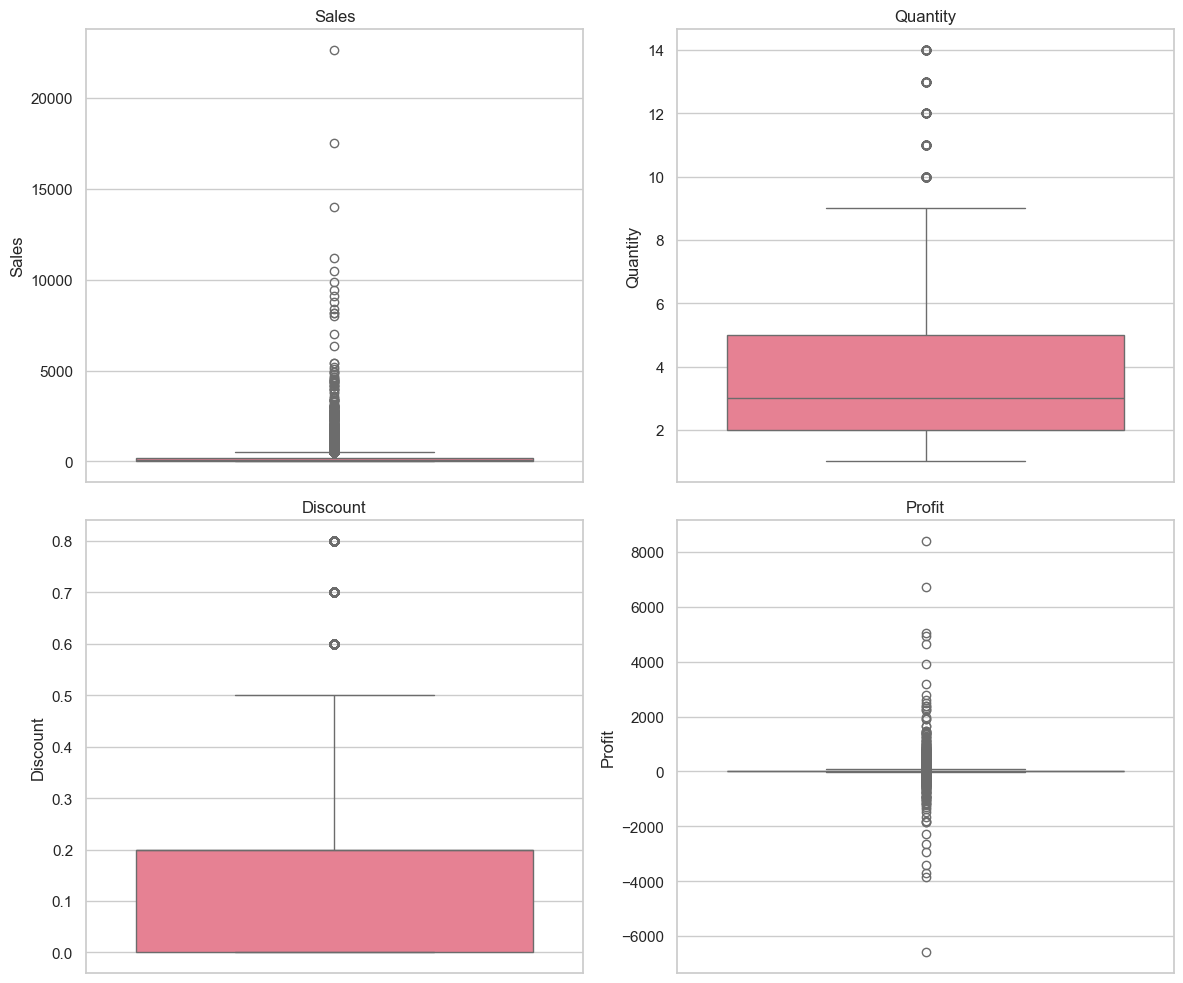

In [16]:

numeric = df[["Sales", "Quantity", "Discount", "Profit"]]
sns.set_theme(style="whitegrid", palette="husl")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)

# Boxplots for each feature
sns.boxplot(y=numeric["Sales"], ax=axes[0, 0]).set_title('Sales')
sns.boxplot(y=numeric["Quantity"], ax=axes[0, 1]).set_title('Quantity')
sns.boxplot(y=numeric["Discount"], ax=axes[1, 0]).set_title('Discount')
sns.boxplot(y=numeric["Profit"], ax=axes[1, 1]).set_title('Profit')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()



In [17]:
results = []

for col in numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    results.append({
        "Category": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Outliers": len(df[df[col] < lower_bound]),
        "Non Outliers": len(non_outliers),
        "Upper Outliers": len(df[df[col] > upper_bound]),
        "Outliers Proportion": f"{len(outliers) / len(df):.4f}"
    })

# Create a DataFrame from the results
outlier_summary_df = pd.DataFrame(results)

# Display the resulting DataFrame
outlier_summary_df


,Category,Lower Bound,Upper Bound,Lower Outliers,Non Outliers,Upper Outliers,Outliers Proportion
0,Sales,-271.710000,498.930000,0,8827,1167,0.1168
1,Quantity,-2.500000,9.500000,0,9824,170,0.0170
2,Discount,-0.300000,0.500000,0,9138,856,0.0857
3,Profit,-39.724125,70.816875,604,8113,1277,0.1882


## </span><span style='color:#008ECC'>Profitabilitas Per Produk</span>

In [18]:
# Menghitung metrik profitabilitas per produk
product_metrics = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Row ID': 'count'  # Jumlah transaksi
}).reset_index()

# Menambahkan kolom margin profit
product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100

# Menambahkan kolom rata-rata penjualan per transaksi
product_metrics['Avg_Sales_Per_Transaction'] = product_metrics['Sales'] / product_metrics['Row ID']

# Mengurutkan berdasarkan total penjualan

# Mengurutkan berdasarkan total penjualan
product_metrics_by_sales = product_metrics.sort_values('Sales', ascending=False)

product_metrics_by_sales

,Product,Sales,Profit,Row ID,Profit_Margin,Avg_Sales_Per_Transaction
3,ContactMatcher,410378.2650,12496.2822,1842,3.045064,222.789503
5,FinanceHub,340935.4150,32136.4203,981,9.425955,347.538649
11,Site Analytics,330007.0540,44515.7306,889,13.489327,371.211534
7,Marketing Suite - Gold,223843.6080,21278.8264,846,9.506113,264.590553
1,Big Ol Database,189238.6310,3384.7569,115,1.788618,1645.553313
4,Data Smasher,167380.3180,41936.6357,775,25.054700,215.974604
0,Alchemy,149528.0300,55617.8249,68,37.195585,2198.941618
13,Support,125152.7440,32864.4698,1560,26.259488,80.226118
6,Marketing Suite,114879.9963,-3472.5560,228,-3.022768,503.859633
8,OneView,107532.1610,18138.0054,466,16.867517,230.755710


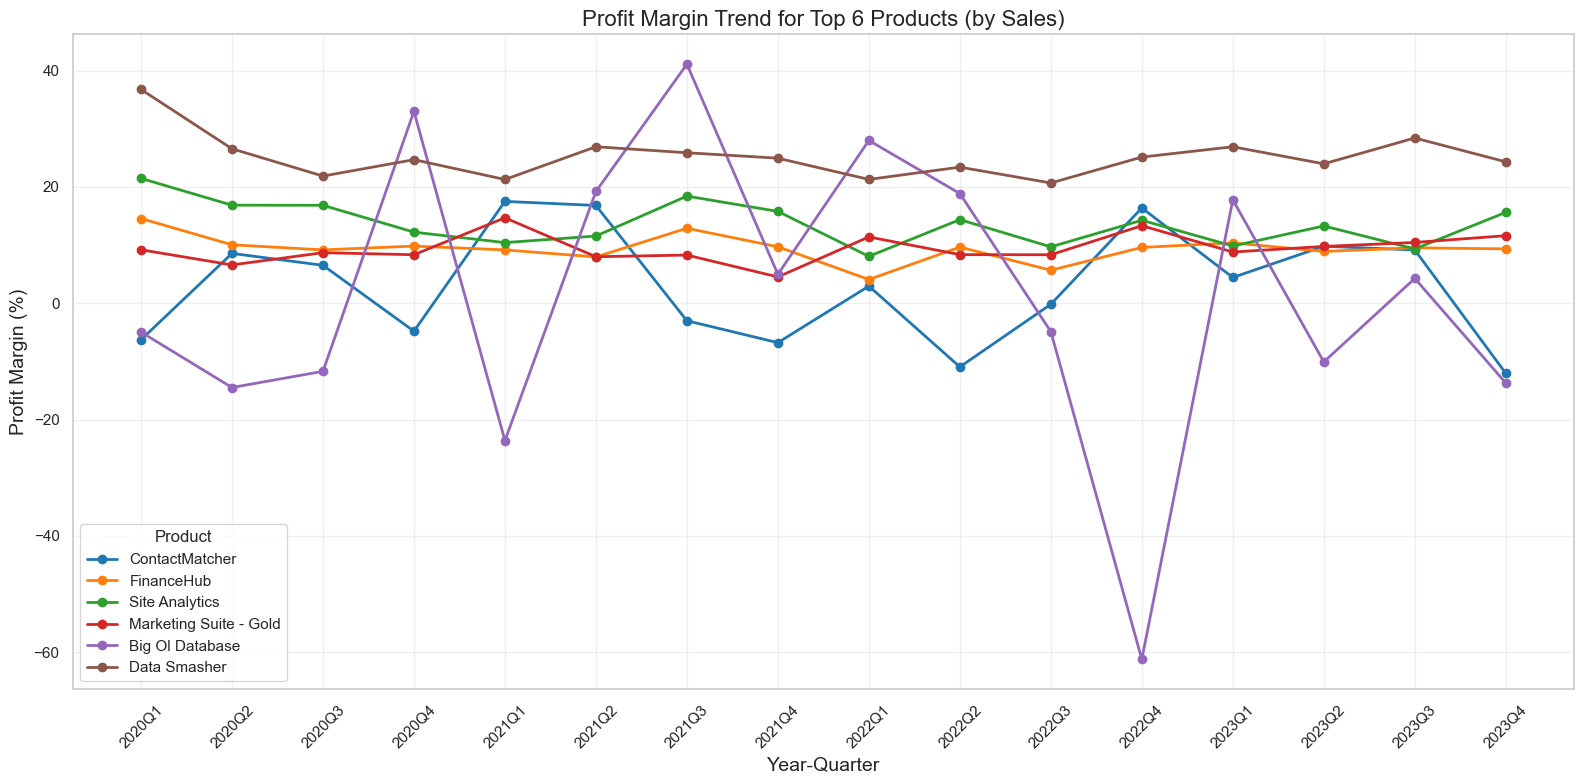

In [19]:

# 6. Visualisasi tren profitabilitas produk dari waktu ke waktu
def plot_product_profitability_trend(time_metrics, top_n=6):
    # Mendapatkan top N produk berdasarkan total penjualan
    top_products = df.groupby('Product')['Sales'].sum().nlargest(top_n).index.tolist()
    
    # Filter data untuk top N produk
    filtered_metrics = time_metrics[time_metrics['Product'].isin(top_products)]

    # Daftar warna yang berbeda untuk setiap produk
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    plt.figure(figsize=(16, 8))

    for i, product in enumerate(top_products):
        product_data = filtered_metrics[filtered_metrics['Product'] == product]
        plt.plot(product_data['YearQuarter'], product_data['Profit_Margin'], 
                marker='o', linewidth=2, label=product, color=colors[i])

    plt.title(f'Profit Margin Trend for Top {top_n} Products (by Sales)', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Profit Margin (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Product')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt.show()

# Membuat variabel time_metrics dari DataFrame utama
# Pastikan df sudah memiliki kolom 'Order Date' dengan format datetime
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').astype(str)

# Mengelompokkan berdasarkan kuartal dan produk
time_metrics = df.groupby(['YearQuarter', 'Product']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Menghitung margin profit
time_metrics['Profit_Margin'] = (time_metrics['Profit'] / time_metrics['Sales']) * 100

# Sekarang panggil fungsi dengan variabel yang sudah dibuat
plot_product_profitability_trend(time_metrics, top_n=6)


In [20]:
# Membagi data menjadi Big Ol Database dan produk lainnya
big_ol_df = df[df['Product'] == 'Big Ol Database'].copy()

In [21]:
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Margin', 
                       'SalesPerUnit', 'ProfitPerUnit', 'Year']
numeric_columns

['Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Profit_Margin',
 'SalesPerUnit',
 'ProfitPerUnit',
 'Year']

In [22]:
# 3. Matriks Korelasi Pearson
corr_matrix = big_ol_df[numeric_columns].corr()
print("\n===== MATRIKS KORELASI ANTAR VARIABEL =====")
print(corr_matrix.round(2))


===== MATRIKS KORELASI ANTAR VARIABEL =====
               Sales  Quantity  Discount  Profit  Profit_Margin  SalesPerUnit  \
Sales           1.00      0.28     -0.14   -0.00           0.10          0.89   
Quantity        0.28      1.00     -0.16    0.05           0.08          0.02   
Discount       -0.14     -0.16      1.00   -0.58          -0.90         -0.17   
Profit         -0.00      0.05     -0.58    1.00           0.60          0.03   
Profit_Margin   0.10      0.08     -0.90    0.60           1.00          0.11   
SalesPerUnit    0.89      0.02     -0.17    0.03           0.11          1.00   
ProfitPerUnit   0.03      0.01     -0.58    0.92           0.61          0.10   
Year           -0.11     -0.00     -0.02   -0.04          -0.04         -0.06   

               ProfitPerUnit  Year  
Sales                   0.03 -0.11  
Quantity                0.01 -0.00  
Discount               -0.58 -0.02  
Profit                  0.92 -0.04  
Profit_Margin           0.61 -0.04  
Sal

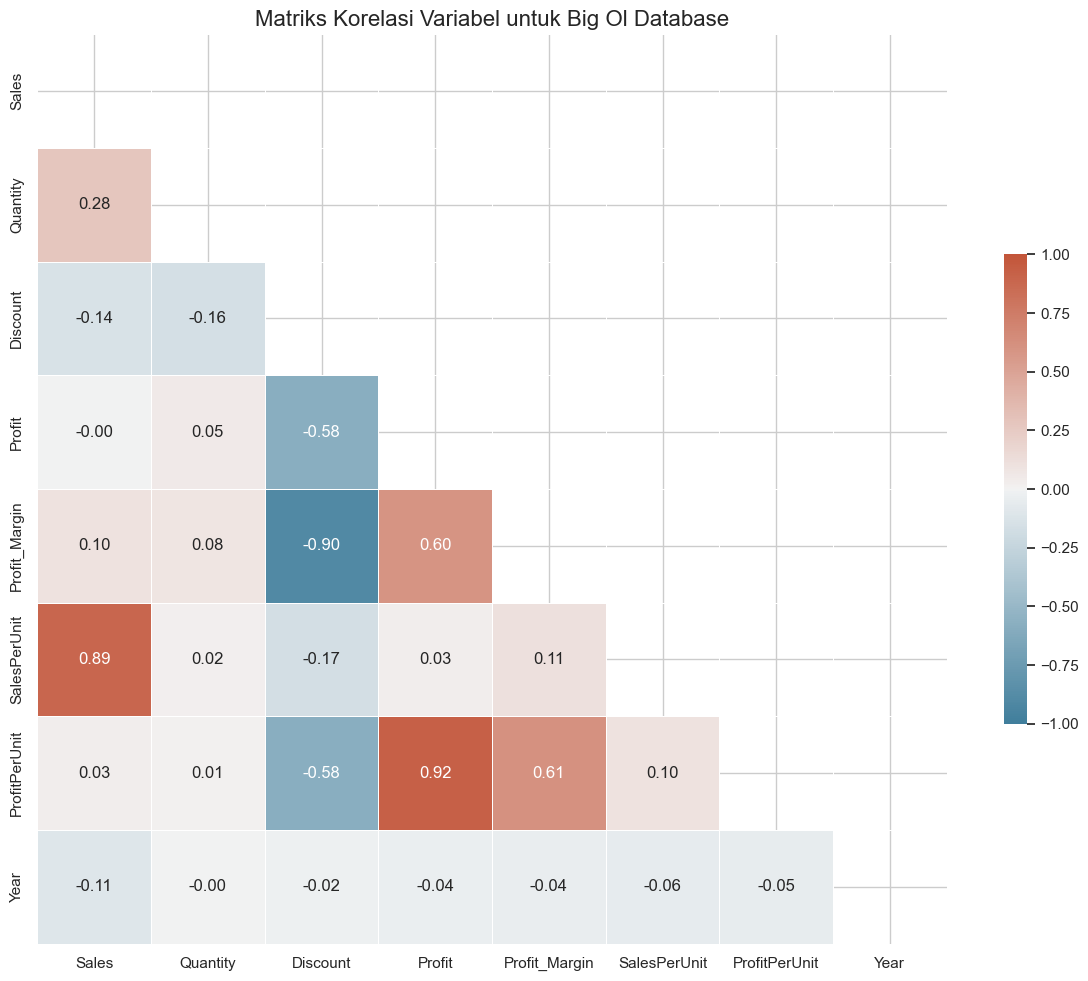

In [23]:
# 4. Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi Variabel untuk Big Ol Database', fontsize=16)
plt.tight_layout()
plt.show()

Statistik per kategori diskon:
  Discount_Category  count        mean   median
0             0-10%     31  570.844581  258.950
1            10-20%     31  391.871484  279.200
2            20-30%      5  296.601200  300.265
3            30-40%     13  339.894923  199.770
4            40-50%     12  745.961250  336.175
5              50%+     23  173.398304  113.997

Menggunakan kategori 0-10% sebagai baseline (median: 258.95)

Hasil perbandingan kategori diskon dengan baseline (0-10%):
  Kategori  Samples   Median vs. Baseline   p-value Signifikan Arah Pengaruh
0   10-20%       31  279.200       ↑ 7.8%  0.499083      Tidak       Positif
1   20-30%        5  300.265      ↑ 16.0%  0.963501      Tidak       Positif
2   30-40%       13  199.770      ↓ 22.9%  0.897628      Tidak       Negatif
3   40-50%       12  336.175      ↑ 29.8%  0.796951      Tidak       Positif
4     50%+       23  113.997      ↓ 56.0%  0.008680         Ya       Negatif


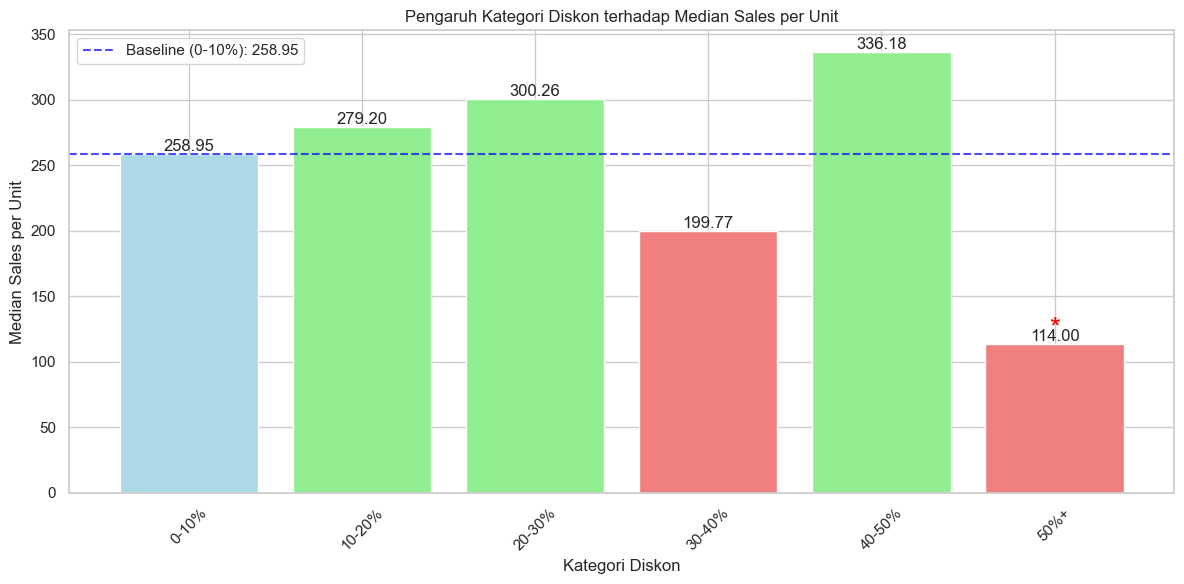


Visualisasi telah disimpan sebagai 'discount_effect.png'

Kesimpulan:
Tolak H0: Kategori diskon berpengaruh signifikan terhadap sales per unit

Detail pengaruh yang signifikan:
- Kategori 50%+ berpengaruh negatif ↓ 56.0% terhadap sales per unit (p-value: 0.0087)


In [24]:

# Menghitung Sales per Unit
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit', 'Discount'])

# Membuat kategori diskon dalam kelipatan 10%
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Tampilkan jumlah data dan statistik per kategori diskon
stats_summary = big_ol_df.groupby('Discount_Category')['SalesPerUnit'].agg(['count', 'mean', 'median']).reset_index()
stats_summary = stats_summary.sort_values('Discount_Category')
print("Statistik per kategori diskon:")
print(stats_summary)

# Definisi hipotesis
H0 = 'Kategori diskon tidak berpengaruh signifikan terhadap sales per unit'
Ha = 'Kategori diskon berpengaruh signifikan terhadap sales per unit'

# Dapatkan kategori dengan minimal 5 data
valid_categories = stats_summary[stats_summary['count'] >= 5]['Discount_Category'].tolist()

# Gunakan kategori dengan diskon terendah sebagai baseline/referensi
if '0-10%' in valid_categories:
    baseline_category = '0-10%'
    baseline_data = big_ol_df[big_ol_df['Discount_Category'] == baseline_category]['SalesPerUnit']
    baseline_median = baseline_data.median()
    
    print(f"\nMenggunakan kategori {baseline_category} sebagai baseline (median: {baseline_median:.2f})")
    
    # Bandingkan setiap kategori diskon dengan baseline
    comparison_results = []
    
    for category in valid_categories:
        if category != baseline_category:
            # Data untuk kategori yang dibandingkan
            category_data = big_ol_df[big_ol_df['Discount_Category'] == category]['SalesPerUnit']
            category_median = category_data.median()
            
            # Uji Mann-Whitney U
            u_stat, p_value = mannwhitneyu(baseline_data, category_data, alternative='two-sided')
            
            # Tentukan arah pengaruh
            if category_median > baseline_median:
                effect_direction = "Positif"
                effect_symbol = "↑"
            else:
                effect_direction = "Negatif"
                effect_symbol = "↓"
            
            # Hitung persentase perbedaan
            pct_diff = (category_median - baseline_median) / baseline_median * 100
            
            # Simpan hasil
            comparison_results.append({
                'Kategori': category,
                'Samples': len(category_data),
                'Median': category_median,
                'vs. Baseline': f"{effect_symbol} {abs(pct_diff):.1f}%",
                'p-value': p_value,
                'Signifikan': 'Ya' if p_value < 0.05 else 'Tidak',
                'Arah Pengaruh': effect_direction
            })
    
    # Tampilkan hasil
    if comparison_results:
        results_df = pd.DataFrame(comparison_results).sort_values('Kategori')
        print("\nHasil perbandingan kategori diskon dengan baseline (0-10%):")
        print(results_df)
        
        # Visualisasi pengaruh diskon terhadap sales per unit
        plt.figure(figsize=(12, 6))
        
        # Data untuk plot
        all_medians = stats_summary.set_index('Discount_Category')['median']
        all_categories = all_medians.index.tolist()
        
        # Plot median per kategori
        bars = plt.bar(all_categories, all_medians, color=[
            'lightblue' if cat == baseline_category else 
            'lightgreen' if all_medians[cat] > baseline_median else 
            'lightcoral' for cat in all_categories
        ])
        
        # Tambahkan label nilai di atas bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
        
        # Tambahkan garis baseline
        plt.axhline(y=baseline_median, color='blue', linestyle='--', alpha=0.7, 
                   label=f'Baseline ({baseline_category}): {baseline_median:.2f}')
        
        # Label signifikansi
        for i, cat in enumerate(all_categories):
            if cat != baseline_category:
                result = results_df[results_df['Kategori'] == cat]
                if not result.empty and result['Signifikan'].values[0] == 'Ya':
                    plt.text(i, all_medians[cat] * 1.05, '*', 
                            fontsize=20, ha='center', color='red')
        
        plt.title('Pengaruh Kategori Diskon terhadap Median Sales per Unit')
        plt.xlabel('Kategori Diskon')
        plt.ylabel('Median Sales per Unit')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('discount_effect.png')
        plt.show()
        plt.close()
        
        print("\nVisualisasi telah disimpan sebagai 'discount_effect.png'")
        
        # Kesimpulan keseluruhan
        significant_results = results_df[results_df['Signifikan'] == 'Ya']
        if len(significant_results) > 0:
            print("\nKesimpulan:")
            print("Tolak H0:", Ha)
            print("\nDetail pengaruh yang signifikan:")
            for _, row in significant_results.iterrows():
                print(f"- Kategori {row['Kategori']} berpengaruh {row['Arah Pengaruh'].lower()} {row['vs. Baseline']} terhadap sales per unit (p-value: {row['p-value']:.4f})")
        else:
            print("\nKesimpulan:")
            print("Gagal tolak H0:", H0)
            print("Tidak ada kategori diskon yang berpengaruh signifikan terhadap sales per unit dibandingkan dengan baseline (0-10%)")
    else:
        print("Tidak ada kategori diskon valid untuk dibandingkan dengan baseline")
else:
    print(f"Kategori baseline (0-10%) tidak memiliki cukup data (minimal 5)")

In [25]:
import pandas as pd
import numpy as np

# Misalkan big_ol_df sudah ada
# Grouping berdasarkan YearQuarter
quarterly = big_ol_df.groupby('YearQuarter').agg({
    'Discount': 'mean',
    'Profit_Margin': 'mean',
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).reset_index()

# Mengurutkan kuartal
quarterly['Year'] = quarterly['YearQuarter'].str[:4].astype(int)  # Ambil 4 karakter pertama untuk tahun
quarterly['Q'] = quarterly['YearQuarter'].str[5:].astype(int)     # Ambil karakter setelah 'Q' untuk kuartal
quarterly = quarterly.sort_values(['Year', 'Q'])

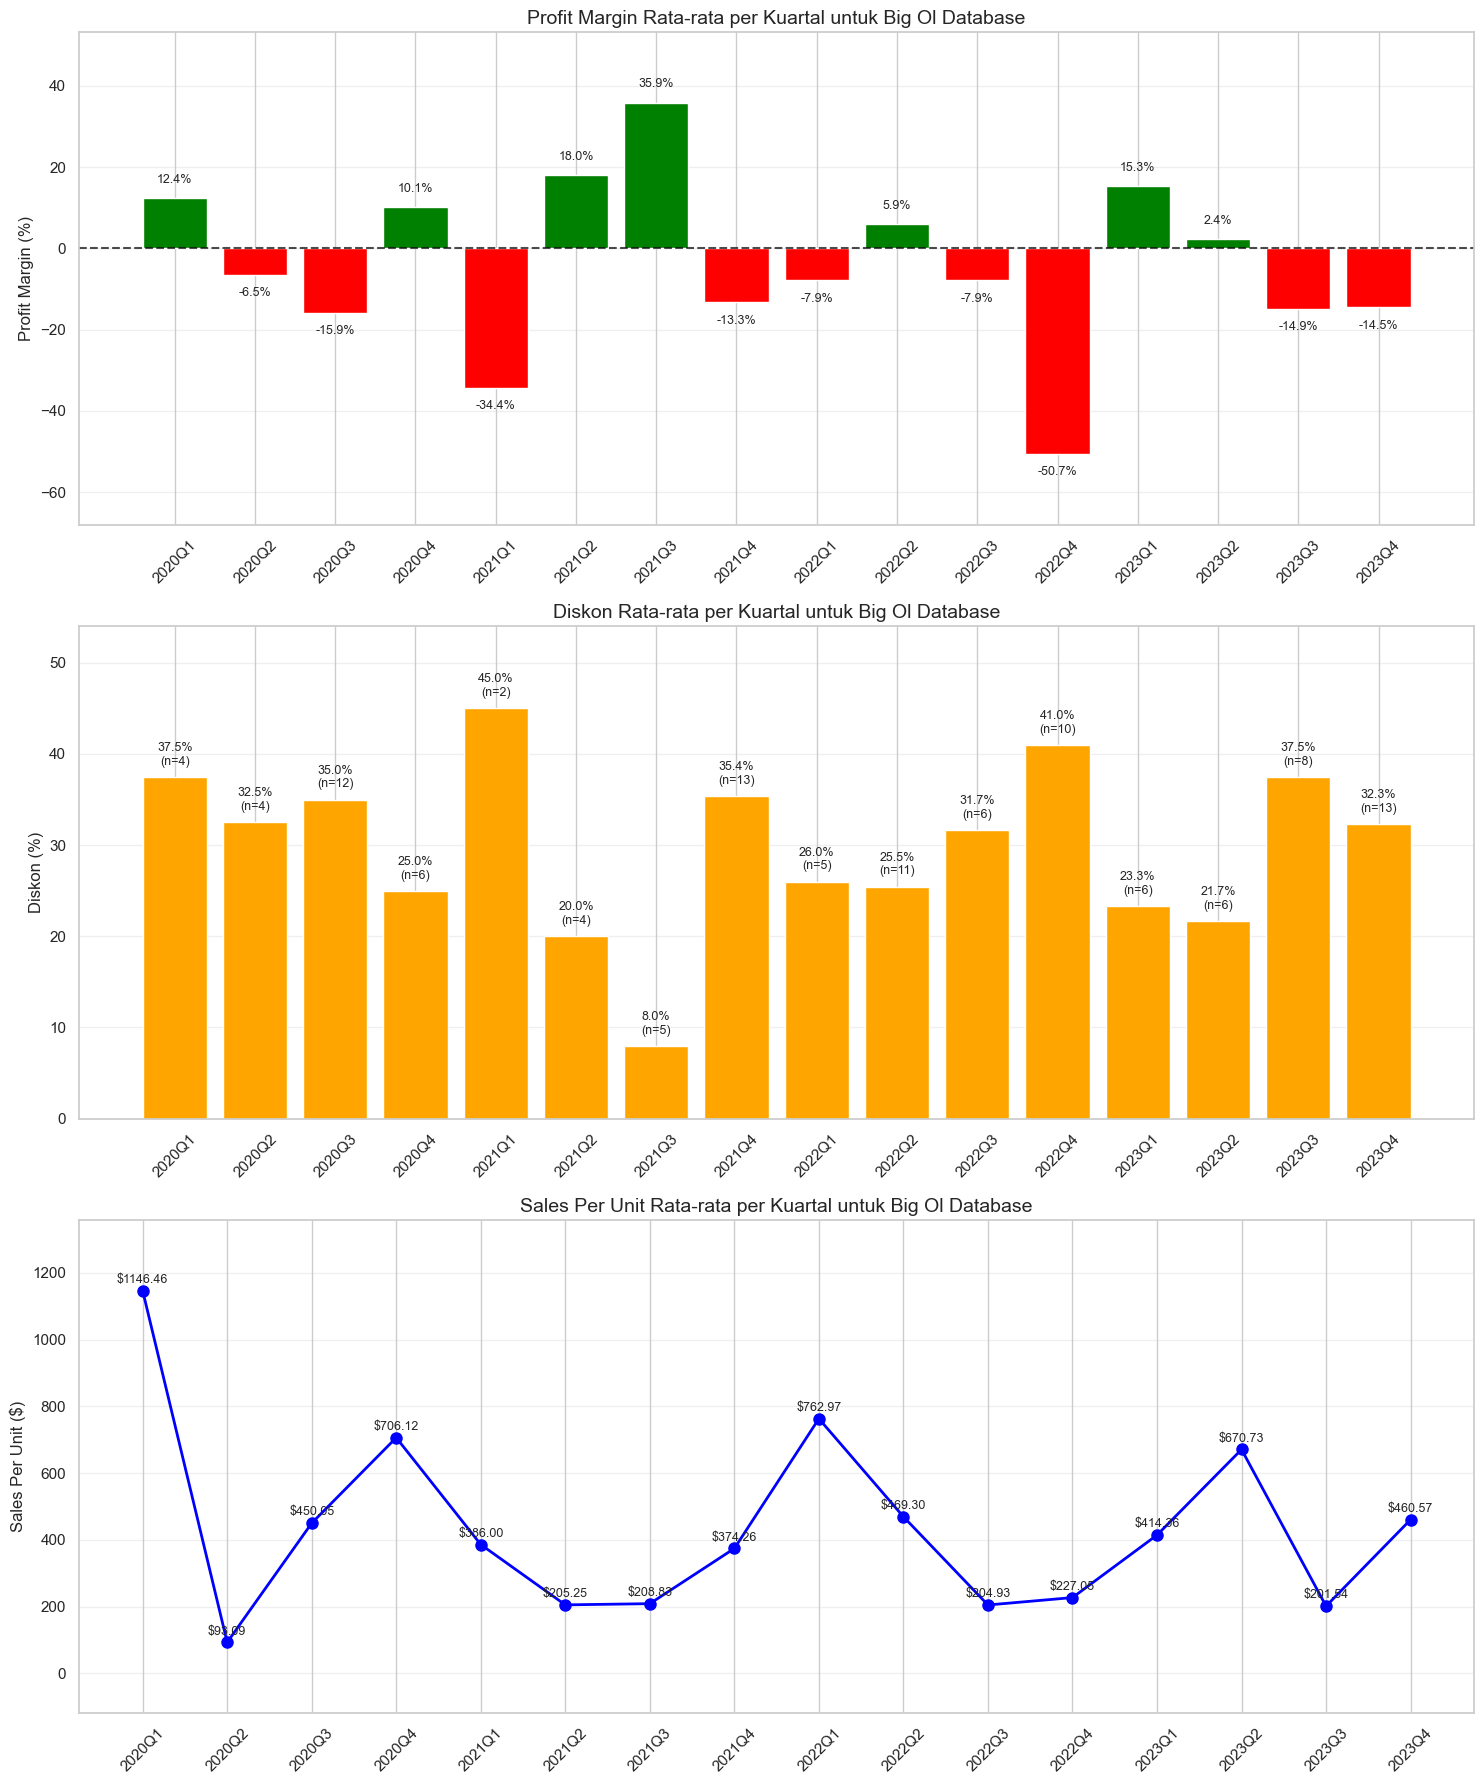

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Misalkan big_ol_df sudah ada
# Grouping berdasarkan YearQuarter
quarterly = big_ol_df.groupby('YearQuarter').agg({
    'Discount': 'mean',
    'Profit_Margin': 'mean',
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'SalesPerUnit': 'mean',  # Tambahkan perhitungan SalesPerUnit
    'Quantity': 'sum'        # Tambahkan Quantity untuk perhitungan alternatif
}).reset_index()

# Mengurutkan kuartal
quarterly['Year'] = quarterly['YearQuarter'].str[:4].astype(int)  # Ambil 4 karakter pertama untuk tahun
quarterly['Q'] = quarterly['YearQuarter'].str[5:].astype(int)     # Ambil karakter setelah 'Q' untuk kuartal
quarterly = quarterly.sort_values(['Year', 'Q'])

# Alternatif perhitungan SalesPerUnit jika tidak ada kolom langsung di dataset
quarterly['CalcSalesPerUnit'] = quarterly['Sales'] / quarterly['Quantity']

# Langkah 3: Visualisasi
plt.figure(figsize=(15, 18))  # Menambah tinggi untuk 3 subplot

# Subplot 1: Profit Margin
plt.subplot(3, 1, 1)
bars = plt.bar(quarterly['YearQuarter'], quarterly['Profit_Margin'], 
               color=quarterly['Profit_Margin'].apply(lambda x: 'green' if x >= 0 else 'red'))

# Tambahkan label pada setiap bar
for bar in bars:
    height = bar.get_height()
    offset = 3 if height >= 0 else -3  # Offset untuk label
    plt.text(bar.get_x() + bar.get_width()/2, 
             height + offset,
             f'{height:.1f}%',
             ha='center', 
             va='bottom' if height >= 0 else 'top',
             fontsize=9)

# Tambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.title('Profit Margin Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Subplot 2: Diskon
plt.subplot(3, 1, 2)
bars = plt.bar(quarterly['YearQuarter'], quarterly['Discount'] * 100, color='orange')

# Kemudian pada label juga perlu disesuaikan
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = quarterly.iloc[i]['Order ID']
    plt.text(bar.get_x() + bar.get_width()/2, 
             height + 1,  # Sesuaikan offset karena nilai sekarang lebih besar
             f'{height:.1f}%\n(n={count})',
             ha='center', 
             va='bottom', 
             fontsize=9)

plt.title('Diskon Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Diskon (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Subplot 3: Sales Per Unit (BARU)
plt.subplot(3, 1, 3)

# Gunakan kolom SalesPerUnit jika tersedia di dataset, jika tidak gunakan perhitungan alternatif
sales_per_unit = quarterly['SalesPerUnit'] if 'SalesPerUnit' in quarterly.columns else quarterly['CalcSalesPerUnit']

# Buat line chart untuk Sales Per Unit
plt.plot(quarterly['YearQuarter'], sales_per_unit, 'bo-', linewidth=2, markersize=8)

# Tambahkan label nilai pada setiap titik
for i, value in enumerate(sales_per_unit):
    plt.text(i, value + (max(sales_per_unit) * 0.02),  # Tambahkan offset 2% dari nilai maksimum
             f'${value:.2f}',
             ha='center',
             fontsize=9)

plt.title('Sales Per Unit Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Sales Per Unit ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Atur layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan grafik
plt.show()

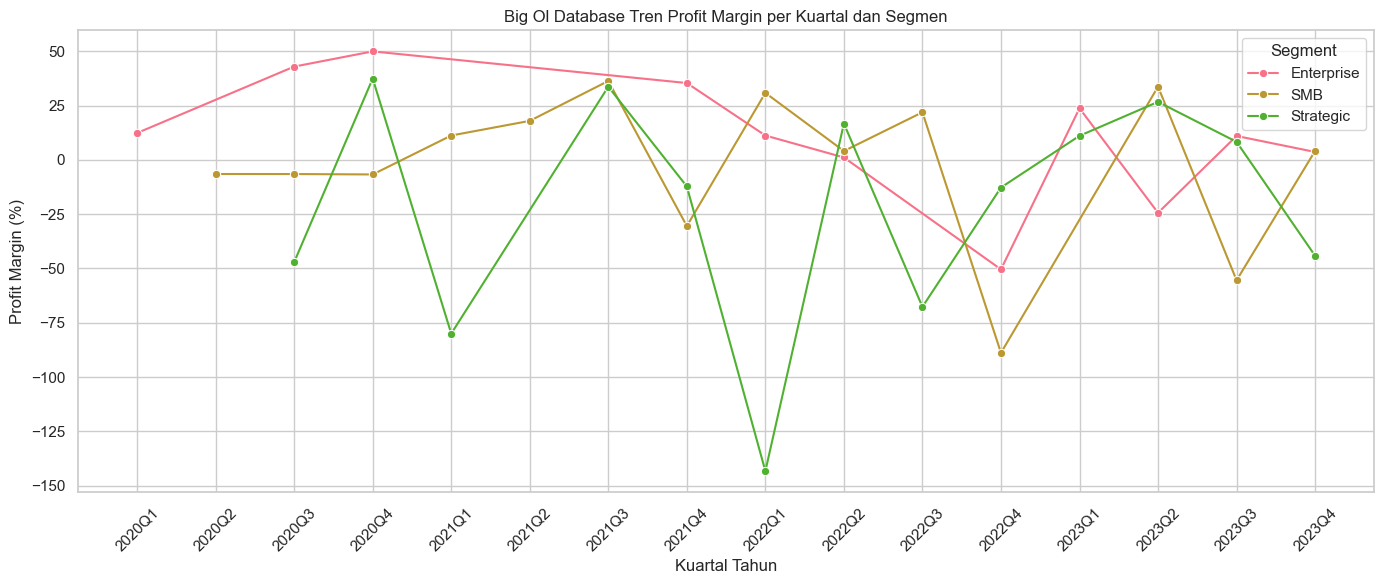

In [27]:
import seaborn as sns
quarterly = big_ol_df.groupby(['YearQuarter', 'Segment'])['Profit_Margin'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=quarterly, x='YearQuarter', y='Profit_Margin', hue='Segment', marker='o')
plt.xticks(rotation=45)
plt.title('Big Ol Database Tren Profit Margin per Kuartal dan Segmen')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Kuartal Tahun')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

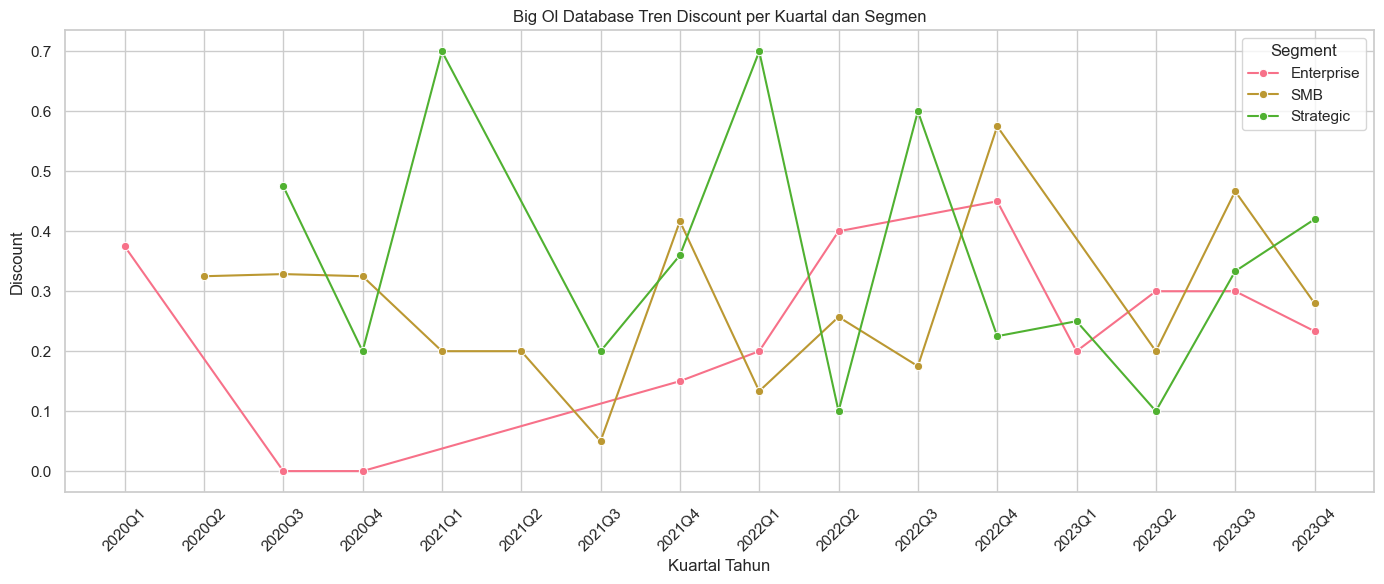

In [28]:
import seaborn as sns
quarterly = big_ol_df.groupby(['YearQuarter', 'Segment'])['Discount'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=quarterly, x='YearQuarter', y='Discount', hue='Segment', marker='o')
plt.xticks(rotation=45)
plt.title('Big Ol Database Tren Discount per Kuartal dan Segmen')
plt.ylabel('Discount')
plt.xlabel('Kuartal Tahun')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

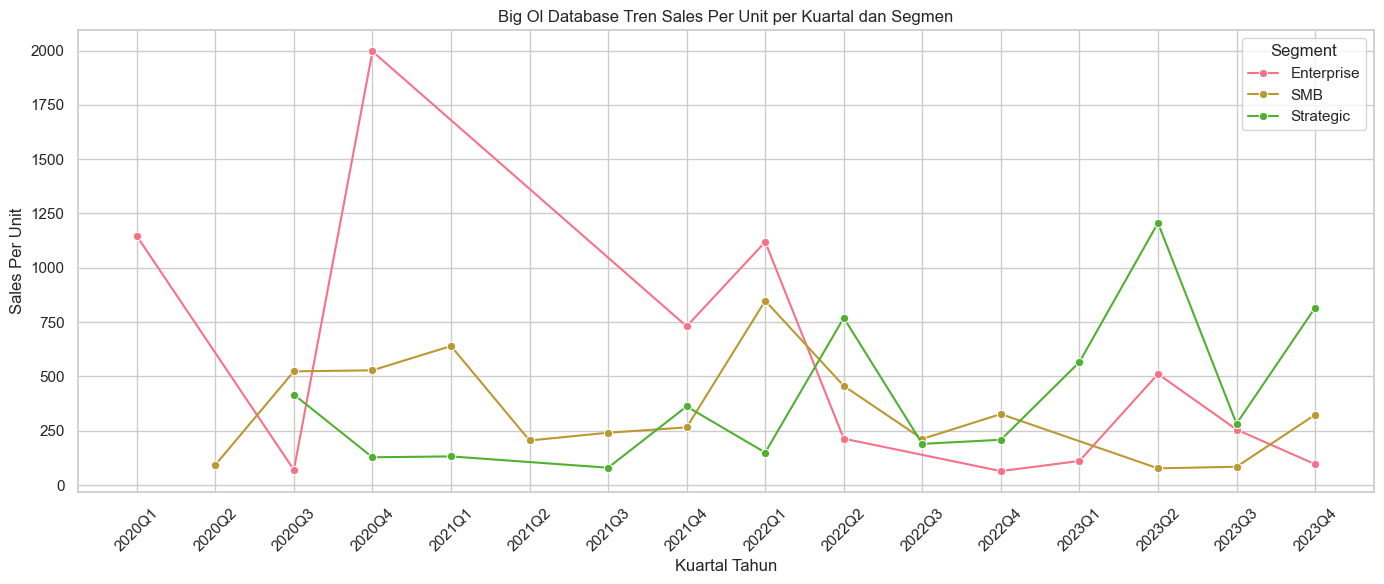

In [29]:
import seaborn as sns
quarterly = big_ol_df.groupby(['YearQuarter', 'Segment'])['SalesPerUnit'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=quarterly, x='YearQuarter', y='SalesPerUnit', hue='Segment', marker='o')
plt.xticks(rotation=45)
plt.title('Big Ol Database Tren Sales Per Unit per Kuartal dan Segmen')
plt.ylabel('Sales Per Unit')
plt.xlabel('Kuartal Tahun')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

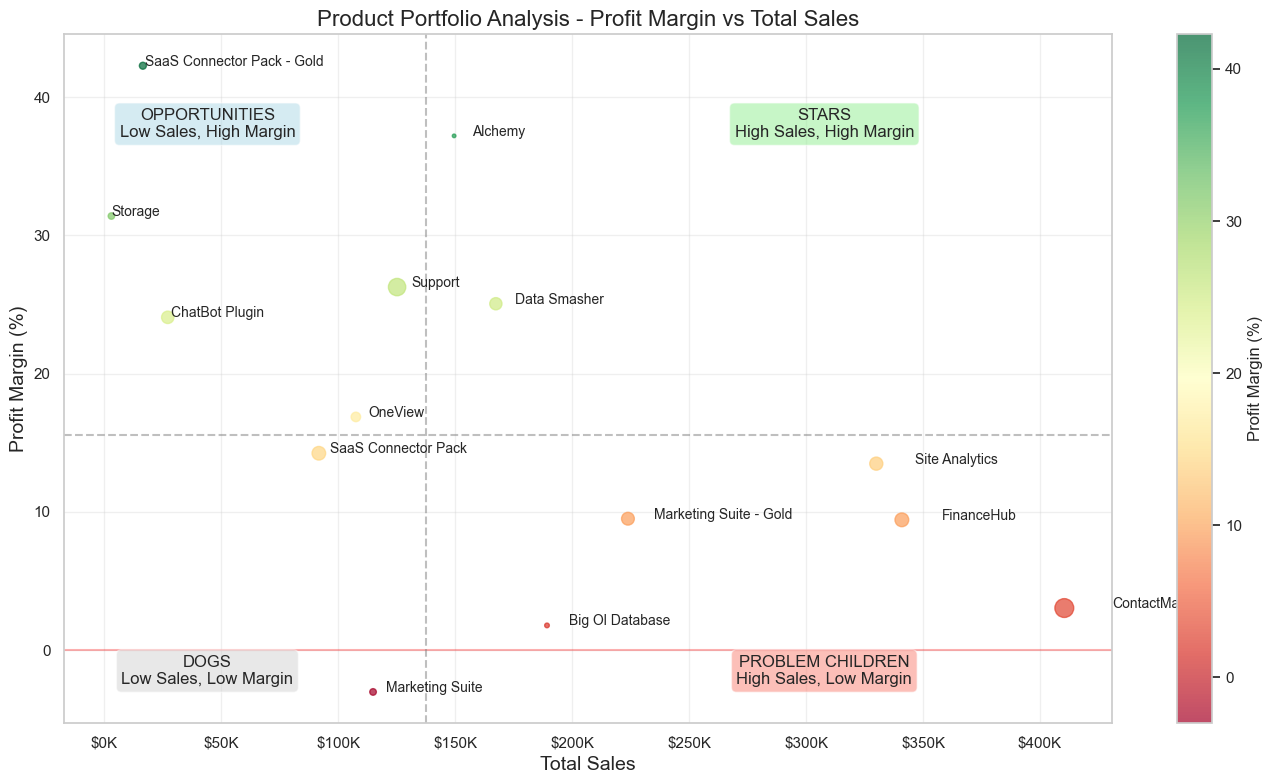

In [30]:

# Analisis portfolio produk (Profit Margin vs Sales)
def visualize_product_portfolio():
    # Menghitung metrik per produk
    product_metrics = df.groupby('Product').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Row ID': 'count'  # Jumlah transaksi
    }).reset_index()
    
    # Menambahkan kolom margin profit
    product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100
    
    # Membuat visualisasi
    plt.figure(figsize=(14, 8))
    
    # Scatter plot dengan ukuran berdasarkan jumlah transaksi
    scatter = plt.scatter(product_metrics['Sales'], 
                         product_metrics['Profit_Margin'], 
                         s=product_metrics['Row ID']/10,
                         alpha=0.7, 
                         c=product_metrics['Profit_Margin'], 
                         cmap='RdYlGn')
    
    # Menambahkan label produk
    for i, row in product_metrics.iterrows():
        plt.annotate(row['Product'], 
                    (row['Sales'] * 1.05, row['Profit_Margin']),
                    fontsize=10)
    
    # Format sumbu x untuk angka yang lebih mudah dibaca
    def thousands_formatter(x, pos):
        return f'${x/1000:.0f}K'
    
    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    # Menambahkan garis dan label kuadran
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3, label='Break-even')
    plt.axvline(x=product_metrics['Sales'].median(), color='gray', linestyle='--', alpha=0.5)
    plt.axhline(y=product_metrics['Profit_Margin'].median(), color='gray', linestyle='--', alpha=0.5)
    
    # Menambahkan teks untuk kuadran
    plt.text(product_metrics['Sales'].max() * 0.75, product_metrics['Profit_Margin'].max() * 0.9, 
             'STARS\nHigh Sales, High Margin', 
             fontsize=12, ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.5))
    
    plt.text(product_metrics['Sales'].min() + product_metrics['Sales'].max() * 0.1, product_metrics['Profit_Margin'].max() * 0.9, 
             'OPPORTUNITIES\nLow Sales, High Margin', 
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))
    
    plt.text(product_metrics['Sales'].max() * 0.75, product_metrics['Profit_Margin'].min() * 0.5, 
             'PROBLEM CHILDREN\nHigh Sales, Low Margin', 
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='salmon', alpha=0.5))
    
    plt.text(product_metrics['Sales'].min() + product_metrics['Sales'].max() * 0.1, product_metrics['Profit_Margin'].min() * 0.5, 
             'DOGS\nLow Sales, Low Margin', 
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.5))
    
    plt.title('Product Portfolio Analysis - Profit Margin vs Total Sales', fontsize=16)
    plt.xlabel('Total Sales', fontsize=14)
    plt.ylabel('Profit Margin (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Profit Margin (%)')
    plt.tight_layout()
    plt.show()
    
    return product_metrics

# Jalankan visualisasi
if __name__ == "__main__":
    metrics = visualize_product_portfolio()

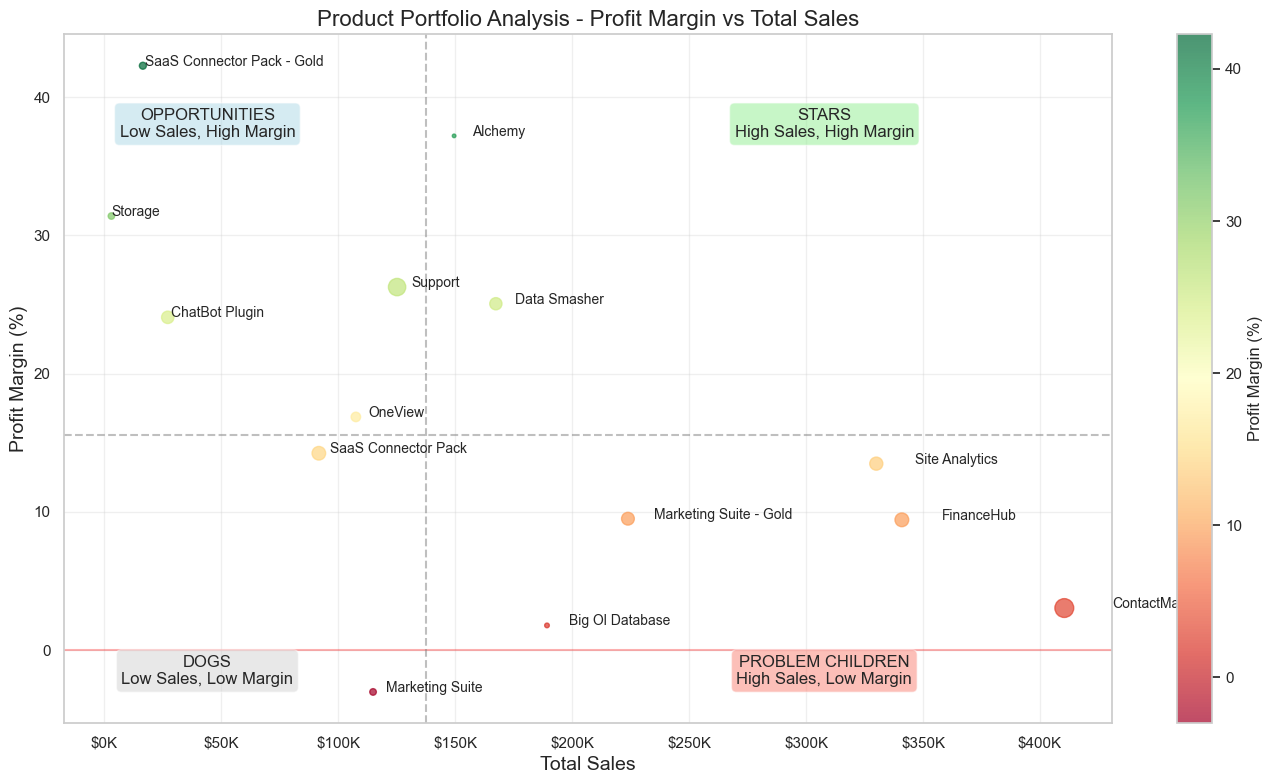

Median Sales: $137,340.39
Median Profit Margin: 15.55%

Hasil Kategorisasi BCG Matrix:
--------------------------------------------------------------------------------
| Produk                   | Penjualan       | Margin    | Kategori            |
--------------------------------------------------------------------------------
| Alchemy                  | $149,528.03      | 37.20%     | STARS           |
| Big Ol Database          | $189,238.63      | 1.79%      | PROBLEM CHILDREN |
| ChatBot Plugin           | $27,118.79       | 24.07%     | OPPORTUNITIES   |
| ContactMatcher           | $410,378.27      | 3.05%      | PROBLEM CHILDREN |
| Data Smasher             | $167,380.32      | 25.05%     | STARS           |
| FinanceHub               | $340,935.41      | 9.43%      | PROBLEM CHILDREN |
| Marketing Suite          | $114,880.00      | -3.02%     | DOGS            |
| Marketing Suite - Gold   | $223,843.61      | 9.51%      | PROBLEM CHILDREN |
| OneView                  | $107,

In [39]:
# Fungsi untuk kategorisasi produk berdasarkan BCG Matrix
def categorize_products(df):
    # Menghitung metrik per produk (sama seperti di visualize_product_portfolio)
    product_metrics = df.groupby('Product').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Row ID': 'count'  # Jumlah transaksi
    }).reset_index()
    
    # Menambahkan kolom margin profit
    product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100
    
    # Hitung median untuk sales dan profit margin
    median_sales = product_metrics['Sales'].median()
    median_margin = product_metrics['Profit_Margin'].median()
    
    print(f"Median Sales: ${median_sales:,.2f}")
    print(f"Median Profit Margin: {median_margin:.2f}%")
    
    # Fungsi untuk menentukan kategori BCG
    def get_category(row):
        if row['Sales'] > median_sales and row['Profit_Margin'] > median_margin:
            return 'STARS'
        elif row['Sales'] > median_sales and row['Profit_Margin'] <= median_margin:
            return 'PROBLEM CHILDREN'
        elif row['Sales'] <= median_sales and row['Profit_Margin'] > median_margin:
            return 'OPPORTUNITIES'
        else:  # Sales <= median_sales and Profit_Margin <= median_margin
            return 'DOGS'
    
    # Tambahkan kolom Category ke DataFrame
    product_metrics['Category'] = product_metrics.apply(get_category, axis=1)
    
    # Tampilkan hasil kategorisasi
    print("\nHasil Kategorisasi BCG Matrix:")
    print("--------------------------------------------------------------------------------")
    print("| Produk                   | Penjualan       | Margin    | Kategori            |")
    print("--------------------------------------------------------------------------------")
    
    for _, row in product_metrics.iterrows():
        product = row['Product'].ljust(24)
        sales = f"${row['Sales']:,.2f}".ljust(16)
        margin = f"{row['Profit_Margin']:.2f}%".ljust(10)
        category = row['Category'].ljust(15)
        print(f"| {product} | {sales} | {margin} | {category} |")
    
    print("--------------------------------------------------------------------------------")
    
    return product_metrics

# Gunakan fungsi ini setelah visualize_product_portfolio
if __name__ == "__main__":
    metrics = visualize_product_portfolio()
    categorized_products = categorize_products(df)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, spearmanr, kruskal, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Membaca data
print("Membaca dan memproses data...")
big_ol_df = pd.read_csv('big_ol_db.csv')

# Memastikan SalesPerUnit sudah dihitung dengan benar
if 'SalesPerUnit' not in big_ol_df.columns:
    big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']

# Menghapus nilai-nilai yang tidak valid
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit'])

# Format angka untuk tampilan yang lebih baik
pd.options.display.float_format = '${:.2f}'.format

# Tambahkan metrik Efisiensi Diskon
def calculate_discount_efficiency(df):
    # Tambahkan epsilon kecil (0.0001) untuk menghindari division by zero
    df['DiscountEfficiency'] = df['SalesPerUnit'] / (df['Discount'] + 0.0001)
    
    # Untuk produk tanpa diskon (diskon = 0), efisiensi adalah SalesPerUnit * 100
    # Ini hanya konvensi untuk memberi nilai tinggi pada item tanpa diskon
    df.loc[df['Discount'] < 0.01, 'DiscountEfficiency'] = df.loc[df['Discount'] < 0.01, 'SalesPerUnit'] * 100
    
    return df

# Terapkan fungsi efisiensi diskon
big_ol_df = calculate_discount_efficiency(big_ol_df)

# 1. STATISTIK DESKRIPTIF
print("\n1. STATISTIK DESKRIPTIF")
print("-" * 80)

# Statistik deskriptif untuk SalesPerUnit dan Efisiensi Diskon
print("\nStatistik SalesPerUnit:")
print(big_ol_df['SalesPerUnit'].describe())

print("\nStatistik Efisiensi Diskon:")
print(big_ol_df['DiscountEfficiency'].describe())

# 2. KATEGORISASI DATA
print("\n2. KATEGORISASI DATA")
print("-" * 80)

# 2.1 Kategori Diskon
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# 2.2 Kategori Efisiensi Diskon
efficiency_percentiles = big_ol_df['DiscountEfficiency'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).tolist()
efficiency_labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
big_ol_df['Efficiency_Category'] = pd.cut(
    big_ol_df['DiscountEfficiency'], 
    bins=efficiency_percentiles, 
    labels=efficiency_labels,
    include_lowest=True
)

# 2.3 Kategori Quantity
quantity_bins = [0, 5, 10, 15, float('inf')]
quantity_labels = ['1-5', '6-10', '11-15', '15+']
big_ol_df['Quantity_Category'] = pd.cut(big_ol_df['Quantity'], bins=quantity_bins, labels=quantity_labels)

print("Kategorisasi data berhasil dibuat.")
print(f"Jumlah data valid: {len(big_ol_df)}")
print(f"Jumlah kategori diskon: {big_ol_df['Discount_Category'].nunique()}")
print(f"Jumlah kategori efisiensi: {big_ol_df['Efficiency_Category'].nunique()}")

# 3. ANALISIS KORELASI
print("\n3. ANALISIS KORELASI")
print("-" * 80)

# Daftar variabel numerik untuk analisis korelasi
numeric_vars = [
    'SalesPerUnit', 'Discount', 'Quantity', 'Profit', 'Profit_Margin', 
    'Sales', 'DiscountEfficiency'
]

# Hitung korelasi Spearman untuk semua variabel numerik
corr_matrix = big_ol_df[numeric_vars].corr(method='spearman').round(4)
print("\nMatriks Korelasi Spearman:")
print(corr_matrix)

# Identifikasi korelasi signifikan dengan SalesPerUnit dan DiscountEfficiency
print("\nKorelasi Spearman dengan SalesPerUnit:")
for var in numeric_vars:
    if var != 'SalesPerUnit':
        corr, p_value = spearmanr(big_ol_df['SalesPerUnit'], big_ol_df[var])
        significance = 'Signifikan' if p_value < 0.05 else 'Tidak Signifikan'
        print(f"{var}: {corr:.4f} (p-value: {p_value:.4f}, {significance})")

print("\nKorelasi Spearman dengan DiscountEfficiency:")
for var in numeric_vars:
    if var != 'DiscountEfficiency':
        corr, p_value = spearmanr(big_ol_df['DiscountEfficiency'], big_ol_df[var])
        significance = 'Signifikan' if p_value < 0.05 else 'Tidak Signifikan'
        print(f"{var}: {corr:.4f} (p-value: {p_value:.4f}, {significance})")

# 4. ANALISIS BERDASARKAN KATEGORI DISKON
print("\n4. ANALISIS BERDASARKAN KATEGORI DISKON")
print("-" * 80)

# Urutkan kategori diskon
discount_order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']

# Analisis SalesPerUnit per kategori diskon
discount_stats = big_ol_df.groupby('Discount_Category').agg({
    'SalesPerUnit': ['count', 'mean', 'median', 'std'],
    'DiscountEfficiency': ['mean', 'median', 'std'],
    'Profit_Margin': 'mean',
    'Discount': 'mean'
})

# Reshape hasil untuk tampilan yang lebih baik
discount_stats.columns = ['_'.join(col).strip('_') for col in discount_stats.columns.values]
discount_stats = discount_stats.reset_index()

# Hitung peringkat order untuk sorting
discount_stats['order'] = discount_stats['Discount_Category'].map({cat: i for i, cat in enumerate(discount_order)})
discount_stats = discount_stats.sort_values('order').drop('order', axis=1)

print("\nStatistik per kategori diskon:")
print(discount_stats)

# Uji Kruskal-Wallis untuk SalesPerUnit berdasarkan kategori diskon
discount_groups = [big_ol_df[big_ol_df['Discount_Category'] == cat]['SalesPerUnit'].values 
                  for cat in discount_order if sum(big_ol_df['Discount_Category'] == cat) > 0]
sales_kw_stat, sales_kw_p = kruskal(*discount_groups)
print(f"\nUji Kruskal-Wallis untuk SalesPerUnit berdasarkan kategori diskon:")
print(f"stat={sales_kw_stat:.4f}, p-value={sales_kw_p:.4f}")
print(f"Kesimpulan: {'Terdapat' if sales_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan SalesPerUnit antar kategori diskon")

# Uji Kruskal-Wallis untuk DiscountEfficiency berdasarkan kategori diskon
efficiency_groups = [big_ol_df[big_ol_df['Discount_Category'] == cat]['DiscountEfficiency'].values 
                    for cat in discount_order if sum(big_ol_df['Discount_Category'] == cat) > 0]
eff_kw_stat, eff_kw_p = kruskal(*efficiency_groups)
print(f"\nUji Kruskal-Wallis untuk DiscountEfficiency berdasarkan kategori diskon:")
print(f"stat={eff_kw_stat:.4f}, p-value={eff_kw_p:.4f}")
print(f"Kesimpulan: {'Terdapat' if eff_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan DiscountEfficiency antar kategori diskon")

# 5. ANALISIS BERDASARKAN SEGMENT
print("\n5. ANALISIS BERDASARKAN SEGMENT")
print("-" * 80)

segment_stats = big_ol_df.groupby('Segment').agg({
    'SalesPerUnit': ['count', 'mean', 'median'],
    'DiscountEfficiency': ['mean', 'median'],
    'Discount': 'mean'
})

# Reshape untuk tampilan yang lebih baik
segment_stats.columns = ['_'.join(col).strip('_') for col in segment_stats.columns.values]
segment_stats = segment_stats.reset_index()
print("\nStatistik per Segment:")
print(segment_stats)

# Uji Kruskal-Wallis untuk Segment
segment_groups = [big_ol_df[big_ol_df['Segment'] == seg]['SalesPerUnit'].values 
                 for seg in big_ol_df['Segment'].unique()]
seg_kw_stat, seg_kw_p = kruskal(*segment_groups)
print(f"\nUji Kruskal-Wallis untuk SalesPerUnit berdasarkan Segment:")
print(f"stat={seg_kw_stat:.4f}, p-value={seg_kw_p:.4f}")
print(f"Kesimpulan: {'Terdapat' if seg_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan SalesPerUnit antar Segment")

# 6. ANALISIS BERDASARKAN REGION
print("\n6. ANALISIS BERDASARKAN REGION")
print("-" * 80)

region_stats = big_ol_df.groupby('Region').agg({
    'SalesPerUnit': ['count', 'mean', 'median'],
    'DiscountEfficiency': ['mean', 'median'],
    'Discount': 'mean'
})

# Reshape untuk tampilan yang lebih baik
region_stats.columns = ['_'.join(col).strip('_') for col in region_stats.columns.values]
region_stats = region_stats.reset_index()
print("\nStatistik per Region:")
print(region_stats)

# Uji Kruskal-Wallis untuk Region
region_groups = [big_ol_df[big_ol_df['Region'] == reg]['SalesPerUnit'].values 
                for reg in big_ol_df['Region'].unique()]
reg_kw_stat, reg_kw_p = kruskal(*region_groups)
print(f"\nUji Kruskal-Wallis untuk SalesPerUnit berdasarkan Region:")
print(f"stat={reg_kw_stat:.4f}, p-value={reg_kw_p:.4f}")
print(f"Kesimpulan: {'Terdapat' if reg_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan SalesPerUnit antar Region")

# 7. ANALISIS BERDASARKAN INDUSTRY
print("\n7. ANALISIS BERDASARKAN INDUSTRY")
print("-" * 80)

# Analisis per industri
industry_stats = big_ol_df.groupby('Industry').agg({
    'SalesPerUnit': ['count', 'mean', 'median'],
    'DiscountEfficiency': ['mean', 'median'],
    'Discount': 'mean'
})

# Reshape untuk tampilan yang lebih baik
industry_stats.columns = ['_'.join(col).strip('_') for col in industry_stats.columns.values]
industry_stats = industry_stats.reset_index().sort_values('SalesPerUnit_median', ascending=False)
print("\nStatistik per Industry:")
print(industry_stats)

# Uji Kruskal-Wallis untuk Industry (hanya untuk industri dengan minimal 5 sampel)
valid_industries = industry_stats[industry_stats['SalesPerUnit_count'] >= 5]['Industry'].tolist()
if len(valid_industries) >= 2:
    industry_groups = [big_ol_df[big_ol_df['Industry'] == ind]['SalesPerUnit'].values 
                      for ind in valid_industries]
    ind_kw_stat, ind_kw_p = kruskal(*industry_groups)
    print(f"\nUji Kruskal-Wallis untuk SalesPerUnit berdasarkan Industry (min. 5 sampel):")
    print(f"stat={ind_kw_stat:.4f}, p-value={ind_kw_p:.4f}")
    print(f"Kesimpulan: {'Terdapat' if ind_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan SalesPerUnit antar Industry")

# 8. ANALISIS BERDASARKAN COUNTRY
print("\n8. ANALISIS BERDASARKAN COUNTRY")
print("-" * 80)

# Analisis per negara
country_stats = big_ol_df.groupby('Country').agg({
    'SalesPerUnit': ['count', 'mean', 'median'],
    'DiscountEfficiency': ['mean', 'median'],
    'Discount': 'mean'
})

# Reshape untuk tampilan yang lebih baik
country_stats.columns = ['_'.join(col).strip('_') for col in country_stats.columns.values]
country_stats = country_stats.reset_index().sort_values('SalesPerUnit_median', ascending=False)
print("\nStatistik per Country (top 10):")
print(country_stats.head(10))  # Tampilkan hanya 10 negara teratas

# Uji Kruskal-Wallis untuk Country (hanya untuk negara dengan minimal 5 sampel)
valid_countries = country_stats[country_stats['SalesPerUnit_count'] >= 5]['Country'].tolist()
if len(valid_countries) >= 2:
    country_groups = [big_ol_df[big_ol_df['Country'] == country]['SalesPerUnit'].values 
                     for country in valid_countries]
    country_kw_stat, country_kw_p = kruskal(*country_groups)
    print(f"\nUji Kruskal-Wallis untuk SalesPerUnit berdasarkan Country (min. 5 sampel):")
    print(f"stat={country_kw_stat:.4f}, p-value={country_kw_p:.4f}")
    print(f"Kesimpulan: {'Terdapat' if country_kw_p < 0.05 else 'Tidak terdapat'} perbedaan signifikan SalesPerUnit antar Country")

# 9. ANALISIS BERDASARKAN EFISIENSI DISKON
print("\n9. ANALISIS BERDASARKAN EFISIENSI DISKON")
print("-" * 80)

# Analisis per kategori efisiensi
efficiency_stats = big_ol_df.groupby('Efficiency_Category').agg({
    'SalesPerUnit': ['count', 'mean', 'median'],
    'Discount': ['mean', 'median'],
    'Profit_Margin': 'mean'
})

# Reshape untuk tampilan yang lebih baik
efficiency_stats.columns = ['_'.join(col).strip('_') for col in efficiency_stats.columns.values]
efficiency_stats = efficiency_stats.reset_index()

# Map kategori efisiensi ke nilai numerik untuk sorting
efficiency_order = {label: i for i, label in enumerate(efficiency_labels)}
efficiency_stats['order'] = efficiency_stats['Efficiency_Category'].map(efficiency_order)
efficiency_stats = efficiency_stats.sort_values('order').drop('order', axis=1)

print("\nStatistik per kategori efisiensi diskon:")
print(efficiency_stats)

# 10. ANALISIS INTERAKSI ANTARA DISKON DAN SEGMENT
print("\n10. ANALISIS INTERAKSI ANTARA DISKON DAN SEGMENT")
print("-" * 80)

# Interaksi Discount x Segment untuk SalesPerUnit
disc_segment_stats = big_ol_df.groupby(['Discount_Category', 'Segment']).agg({
    'SalesPerUnit': ['count', 'median'],
    'DiscountEfficiency': 'median'
})

# Reshape untuk tampilan yang lebih baik
disc_segment_stats.columns = ['_'.join(col).strip('_') for col in disc_segment_stats.columns.values]
disc_segment_stats = disc_segment_stats.reset_index()

# Filter hanya kombinasi dengan jumlah sampel yang cukup
disc_segment_stats = disc_segment_stats[disc_segment_stats['SalesPerUnit_count'] >= 3]

print("\nStatistik SalesPerUnit per kombinasi Discount_Category dan Segment:")
# Pivot tabel untuk tampilan matriks
print(pd.pivot_table(
    disc_segment_stats, 
    values='SalesPerUnit_median', 
    index='Discount_Category', 
    columns='Segment',
    aggfunc='first'
).fillna('-'))

# 11. ANALISIS INTERAKSI ANTARA DISKON DAN REGION
print("\n11. ANALISIS INTERAKSI ANTARA DISKON DAN REGION")
print("-" * 80)

# Interaksi Discount x Region untuk SalesPerUnit
disc_region_stats = big_ol_df.groupby(['Discount_Category', 'Region']).agg({
    'SalesPerUnit': ['count', 'median'],
    'DiscountEfficiency': 'median'
})

# Reshape untuk tampilan yang lebih baik
disc_region_stats.columns = ['_'.join(col).strip('_') for col in disc_region_stats.columns.values]
disc_region_stats = disc_region_stats.reset_index()

# Filter hanya kombinasi dengan jumlah sampel yang cukup
disc_region_stats = disc_region_stats[disc_region_stats['SalesPerUnit_count'] >= 3]

print("\nStatistik SalesPerUnit per kombinasi Discount_Category dan Region:")
# Pivot tabel untuk tampilan matriks
print(pd.pivot_table(
    disc_region_stats, 
    values='SalesPerUnit_median', 
    index='Discount_Category', 
    columns='Region',
    aggfunc='first'
).fillna('-'))

# 12. ANALISIS KOMBINASI OPTIMAL
print("\n12. ANALISIS KOMBINASI OPTIMAL UNTUK SALESPERUNIT TINGGI")
print("-" * 80)

# Kombinasi semua variabel penting untuk Sales Per Unit tinggi
key_vars = ['Discount_Category', 'Segment', 'Region', 'Industry']
available_vars = [var for var in key_vars if var in big_ol_df.columns]

combo_stats = big_ol_df.groupby(available_vars).agg({
    'SalesPerUnit': ['count', 'median'],
    'DiscountEfficiency': 'median'
})

# Reshape untuk tampilan yang lebih baik
combo_stats.columns = ['_'.join(col).strip('_') for col in combo_stats.columns.values]
combo_stats = combo_stats.reset_index()

# Filter kombinasi dengan jumlah sampel yang cukup
combo_stats = combo_stats[combo_stats['SalesPerUnit_count'] >= 3]
combo_stats = combo_stats.sort_values('SalesPerUnit_median', ascending=False)

print("\nKombinasi optimal untuk SalesPerUnit tertinggi (min. 3 sampel):")
print(combo_stats.head(10))

# 13. ANALISIS KOMBINASI OPTIMAL UNTUK EFISIENSI DISKON
print("\n13. ANALISIS KOMBINASI OPTIMAL UNTUK EFISIENSI DISKON")
print("-" * 80)

# Urutkan berdasarkan DiscountEfficiency
combo_stats_eff = combo_stats.sort_values('DiscountEfficiency_median', ascending=False)

print("\nKombinasi optimal untuk Efisiensi Diskon tertinggi (min. 3 sampel):")
print(combo_stats_eff.head(10))

# 14. KESIMPULAN
print("\n14. KESIMPULAN ANALISIS")
print("-" * 80)

# Simpan nilai median teratas untuk SalesPerUnit dan DiscountEfficiency
top_sales_combo = combo_stats.iloc[0]
top_eff_combo = combo_stats_eff.iloc[0]

# Kesimpulan berdasarkan korelasi
print("\n1. Korelasi penting:")
corr_sales_discount = corr_matrix.loc['SalesPerUnit', 'Discount']
corr_sales_profit = corr_matrix.loc['SalesPerUnit', 'Profit_Margin']
corr_eff_discount = corr_matrix.loc['DiscountEfficiency', 'Discount']

print(f"   - Korelasi SalesPerUnit dengan Discount: {corr_sales_discount:.4f}")
print(f"   - Korelasi SalesPerUnit dengan Profit_Margin: {corr_sales_profit:.4f}")
print(f"   - Korelasi DiscountEfficiency dengan Discount: {corr_eff_discount:.4f}")

# Kesimpulan kategori diskon
print("\n2. Analisis kategori diskon:")
best_discount = discount_stats.loc[discount_stats['SalesPerUnit_median'].idxmax(), 'Discount_Category']
worst_discount = discount_stats.loc[discount_stats['SalesPerUnit_median'].idxmin(), 'Discount_Category']
print(f"   - Kategori diskon terbaik untuk SalesPerUnit: {best_discount}")
print(f"   - Kategori diskon terburuk untuk SalesPerUnit: {worst_discount}")

# Kesimpulan segment
if 'Segment' in big_ol_df.columns:
    print("\n3. Analisis segment:")
    best_segment = segment_stats.loc[segment_stats['SalesPerUnit_median'].idxmax(), 'Segment']
    print(f"   - Segment terbaik untuk SalesPerUnit: {best_segment}")
    
# Kesimpulan region
if 'Region' in big_ol_df.columns:
    print("\n4. Analisis region:")
    best_region = region_stats.loc[region_stats['SalesPerUnit_median'].idxmax(), 'Region']
    print(f"   - Region terbaik untuk SalesPerUnit: {best_region}")

# Kesimpulan industry
if 'Industry' in big_ol_df.columns and len(valid_industries) >= 1:
    print("\n5. Analisis industry:")
    best_industry = industry_stats.iloc[0]['Industry']
    print(f"   - Industry terbaik untuk SalesPerUnit: {best_industry}")

# Kombinasi optimal
print("\n6. Kombinasi optimal untuk SalesPerUnit tinggi:")
for var in available_vars:
    print(f"   - {var}: {top_sales_combo[var]}")
print(f"   - Median SalesPerUnit: ${top_sales_combo['SalesPerUnit_median']:.2f}")

print("\n7. Kombinasi optimal untuk Efisiensi Diskon tinggi:")
for var in available_vars:
    print(f"   - {var}: {top_eff_combo[var]}")
print(f"   - Median Efisiensi Diskon: {top_eff_combo['DiscountEfficiency_median']:.2f}")

# Temuan utama tentang diskon
print("\n8. Temuan utama tentang diskon:")
if worst_discount == '50%+':
    print("   - Diskon tertinggi (50%+) justru menghasilkan SalesPerUnit terendah")
    print("   - Hal ini menunjukkan bahwa diskon yang terlalu tinggi mungkin mengurangi")
    print("     persepsi nilai produk atau menarik pelanggan yang lebih sensitif terhadap harga")

# Rekomendasi
print("\n9. Rekomendasi strategis:")
print("   a. Optimasi strategi diskon:")
if best_discount != '50%+':
    print(f"      - Prioritaskan kategori diskon {best_discount} yang menghasilkan SalesPerUnit tertinggi")
    print("      - Kurangi penggunaan diskon 50%+ yang menghasilkan SalesPerUnit terendah")

# Rekomendasi berdasarkan segmen
if 'Segment' in big_ol_df.columns:
    print("\n   b. Fokus pada segmen pelanggan:")
    print(f"      - Prioritaskan segmen {best_segment} yang memberikan nilai SalesPerUnit tertinggi")

# Rekomendasi berdasarkan kombinasi optimal
print("\n   c. Fokus pada kombinasi optimal:")
for var in available_vars:
    print(f"      - {var}: {top_sales_combo[var]}")

print("\n10. Insight utama:")
print("    - Terdapat hubungan terbalik antara besaran diskon dengan Sales Per Unit")
print("    - Efisiensi diskon menurun drastis pada diskon yang sangat tinggi")
print("    - Untuk meningkatkan Sales Per Unit, strategi diskon perlu disesuaikan")
print("      berdasarkan segment, region, dan industry")

Membaca dan memproses data...

1. STATISTIK DESKRIPTIF
--------------------------------------------------------------------------------

Statistik SalesPerUnit:
count    $115.00
mean     $423.35
std      $574.65
min        $4.33
25%       $95.97
50%      $199.77
75%      $452.12
max     $3773.08
Name: SalesPerUnit, dtype: float64

Statistik Efisiensi Diskon:
count      $115.00
mean     $14971.00
std      $38057.04
min          $6.19
25%        $260.11
50%       $1199.69
75%       $5395.28
max     $199599.00
Name: DiscountEfficiency, dtype: float64

2. KATEGORISASI DATA
--------------------------------------------------------------------------------
Kategorisasi data berhasil dibuat.
Jumlah data valid: 115
Jumlah kategori diskon: 6
Jumlah kategori efisiensi: 5

3. ANALISIS KORELASI
--------------------------------------------------------------------------------

Matriks Korelasi Spearman:
                    SalesPerUnit  Discount  Quantity  Profit  Profit_Margin  \
SalesPerUnit        

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kruskal

# ========== FUNGSI UTAMA ==========
def main():
    # Inisialisasi list untuk menyimpan kesimpulan
    kesimpulan = []
    
    # 1. LOAD DATA
    print("Memuat data...")
    try:
        big_ol_df = pd.read_csv('big_ol_db.csv')
        
        # Hitung SalesPerUnit jika belum ada
        if 'SalesPerUnit' not in big_ol_df.columns:
            big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
        
        # Bersihkan data
        big_ol_df = big_ol_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['SalesPerUnit'])
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return
    
    # 2. ANALISIS KORELASI
    print("\nMelakukan analisis korelasi...")
    numeric_vars = ['SalesPerUnit', 'Discount', 'Quantity', 'Profit', 'Profit_Margin', 'Sales']
    corr_matrix = big_ol_df[numeric_vars].corr(method='spearman')
    
    # Simpan hasil korelasi penting
    kesimpulan.append("## HASIL ANALISIS STATISTIK\n")
    kesimpulan.append("### 1. Analisis Korelasi")
    kesimpulan.append(f"- Korelasi SalesPerUnit vs Discount: {corr_matrix.loc['SalesPerUnit', 'Discount']:.3f} (arah {'negatif' if corr_matrix.loc['SalesPerUnit', 'Discount'] < 0 else 'positif'})")
    kesimpulan.append(f"- Korelasi SalesPerUnit vs Profit: {corr_matrix.loc['SalesPerUnit', 'Profit']:.3f}")
    
    # 3. ANALISIS DISKON
    print("\nMenganalisis kategori diskon...")
    big_ol_df['Discount_Category'] = pd.cut(big_ol_df['Discount'],
                                           bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
                                           labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'])
    
    # Uji statistik
    discount_groups = [big_ol_df[big_ol_df['Discount_Category'] == cat]['SalesPerUnit'] 
                     for cat in big_ol_df['Discount_Category'].cat.categories]
    h_stat, p_value = kruskal(*discount_groups)
    
    # Simpan hasil
    kesimpulan.append("\n### 2. Analisis Kategori Diskon")
    kesimpulan.append(f"- Perbedaan signifikan antar kategori? {'Ya' if p_value < 0.05 else 'Tidak'} (p-value: {p_value:.4f})")
    kesimpulan.append("- Rata-rata SalesPerUnit per kategori:")
    
    stats = big_ol_df.groupby('Discount_Category')['SalesPerUnit'].agg(['median', 'count'])
    for idx, row in stats.iterrows():
        kesimpulan.append(f"  - {idx}: ${row['median']:.2f} (n={row['count']})")
    
    # 4. ANALISIS SEGMEN
    if 'Segment' in big_ol_df.columns:
        print("\nMenganalisis per segmen...")
        segmen_groups = [big_ol_df[big_ol_df['Segment'] == seg]['SalesPerUnit'] 
                        for seg in big_ol_df['Segment'].unique()]
        h_stat, p_value = kruskal(*segmen_groups)
        
        kesimpulan.append("\n### 3. Analisis Segment")
        kesimpulan.append(f"- Perbedaan signifikan antar segmen? {'Ya' if p_value < 0.05 else 'Tidak'} (p-value: {p_value:.4f})")
        
        segmen_stats = big_ol_df.groupby('Segment')['SalesPerUnit'].median().sort_values(ascending=False)
        kesimpulan.append("- Performa terbaik ke terburuk:")
        for seg, val in segmen_stats.items():
            kesimpulan.append(f"  - {seg}: ${val:.2f}")
    
    # 5. KOMBINASI OPTIMAL
    print("\nMencari kombinasi optimal...")
    if all(col in big_ol_df.columns for col in ['Discount_Category', 'Segment', 'Region']):
        kombinasi = big_ol_df.groupby(['Discount_Category', 'Segment', 'Region'])['SalesPerUnit'].agg(['median', 'count'])
        kombinasi = kombinasi[kombinasi['count'] >= 3].sort_values('median', ascending=False)
        
        if not kombinasi.empty:
            best_combo = kombinasi.iloc[0]
            kesimpulan.append("\n### 4. Kombinasi Optimal")
            kesimpulan.append(f"- Kombinasi terbaik (SalesPerUnit tertinggi):")
            kesimpulan.append(f"  - Diskon: {best_combo.name[0]}")
            kesimpulan.append(f"  - Segmen: {best_combo.name[1]}")
            kesimpulan.append(f"  - Region: {best_combo.name[2]}")
            kesimpulan.append(f"  - Nilai Median: ${best_combo['median']:.2f}")
    
    # 6. REKOMENDASI STRATEGIS
    kesimpulan.append("\n### 5. Rekomendasi Strategis")
    if 'Discount_Category' in locals():
        if p_value < 0.05:
            best_discount = stats['median'].idxmax()
            kesimpulan.append(f"- Fokuskan pada kategori diskon {best_discount} yang memberikan SalesPerUnit tertinggi")
    
    if 'Segment' in big_ol_df.columns:
        best_segment = segmen_stats.index[0]
        kesimpulan.append(f"- Prioritaskan segmen {best_segment} yang memiliki performa terbaik")
    
    # Output hasil untuk markdown
    print("\n" + "="*50)
    print("SALIN UNTUK MARKDOWN:")
    print("="*50)
    print("\n".join(kesimpulan))
    print("\n" + "="*50)

if __name__ == "__main__":
    main()

Memuat data...

Melakukan analisis korelasi...

Menganalisis kategori diskon...

Menganalisis per segmen...

Mencari kombinasi optimal...

SALIN UNTUK MARKDOWN:
## HASIL ANALISIS STATISTIK

### 1. Analisis Korelasi
- Korelasi SalesPerUnit vs Discount: -0.216 (arah negatif)
- Korelasi SalesPerUnit vs Profit: 0.294

### 2. Analisis Kategori Diskon
- Perbedaan signifikan antar kategori? Ya (p-value: 0.0269)
- Rata-rata SalesPerUnit per kategori:
  - 0-10%: $823.49 (n=2.0)
  - 10-20%: $279.20 (n=31.0)
  - 20-30%: $300.26 (n=5.0)
  - 30-40%: $199.77 (n=13.0)
  - 40-50%: $336.18 (n=12.0)
  - 50%+: $114.00 (n=23.0)

### 3. Analisis Segment
- Perbedaan signifikan antar segmen? Tidak (p-value: 0.4981)
- Performa terbaik ke terburuk:
  - Enterprise: $287.45
  - Strategic: $239.64
  - SMB: $172.49

### 4. Kombinasi Optimal
- Kombinasi terbaik (SalesPerUnit tertinggi):
  - Diskon: 40-50%
  - Segmen: Strategic
  - Region: EMEA
  - Nilai Median: $347.85

### 5. Rekomendasi Strategis
- Prioritaskan s

NameError: name 'yearly_profit' is not defined

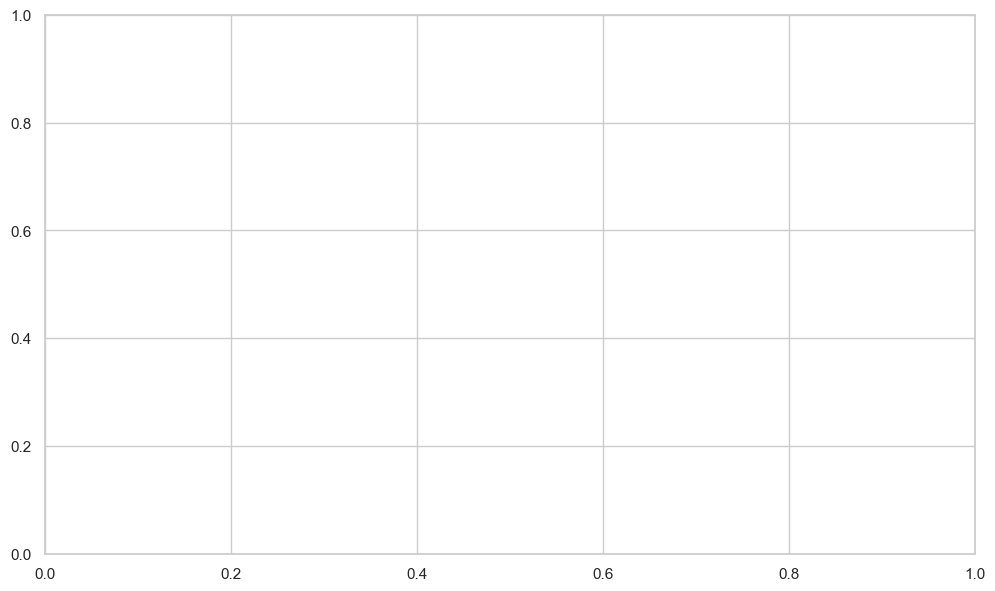

In [46]:
# Visualisasi gabungan penjualan, profit, dan margin profit
plt.figure(figsize=(12, 7))
ax = plt.subplot(111)

bar_width = 0.35
x = np.arange(len(yearly_profit))

# Plot bars untuk Sales dan Profit
sales_bar = ax.bar(x - bar_width/2, yearly_profit['Sales'], bar_width, 
                   label='Penjualan', color='skyblue')

profit_bar = ax.bar(x + bar_width/2, yearly_profit['Profit'], bar_width, 
                    label='Profit', color='green')

# Menambahkan anotasi nilai pada bar
for i, bar in enumerate(sales_bar):
    height = bar.get_height()
    ax.annotate(f'${height:,.0f}',
               xy=(bar.get_x() + bar.get_width()/2, height),
               xytext=(0, 3),
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(profit_bar):
    height = bar.get_height()
    ax.annotate(f'${height:,.0f}',
               xy=(bar.get_x() + bar.get_width()/2, height),
               xytext=(0, 3),
               textcoords="offset points",
               ha='center', va='bottom', fontsize=9)

# Plot line untuk Profit Margin (sumbu y sekunder)
ax2 = ax.twinx()
margin_line = ax2.plot(x, yearly_profit['Profit_Margin'], 'ro-', linewidth=2, 
                      markersize=8, label='Margin Profit (%)')

# Menambahkan anotasi nilai margin profit
for i, y in enumerate(yearly_profit['Profit_Margin']):
    ax2.annotate(f'{y:.1f}%', 
                xy=(x[i], y),
                xytext=(0, 8),
                textcoords="offset points",
                ha='center', va='bottom', 
                color='red', fontsize=10)

# Konfigurasi plot
ax.set_xlabel('Tahun', fontsize=14)
ax.set_ylabel('Nilai ($)', fontsize=14)
ax2.set_ylabel('Margin Profit (%)', fontsize=14, color='r')
ax.set_title('Tren Profitabilitas SaaS Tahunan', fontsize=16)

# Memastikan sumbu y dimulai dari 0
ax.set_ylim(bottom=0)

# Mengatur format x-axis dengan tahun yang benar
ax.set_xticks(x)
ax.set_xticklabels([str(int(year)) for year in yearly_profit['Year']])

# Format angka untuk sumbu y dalam format dolar
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Menggabungkan legends dari dua sumbu
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

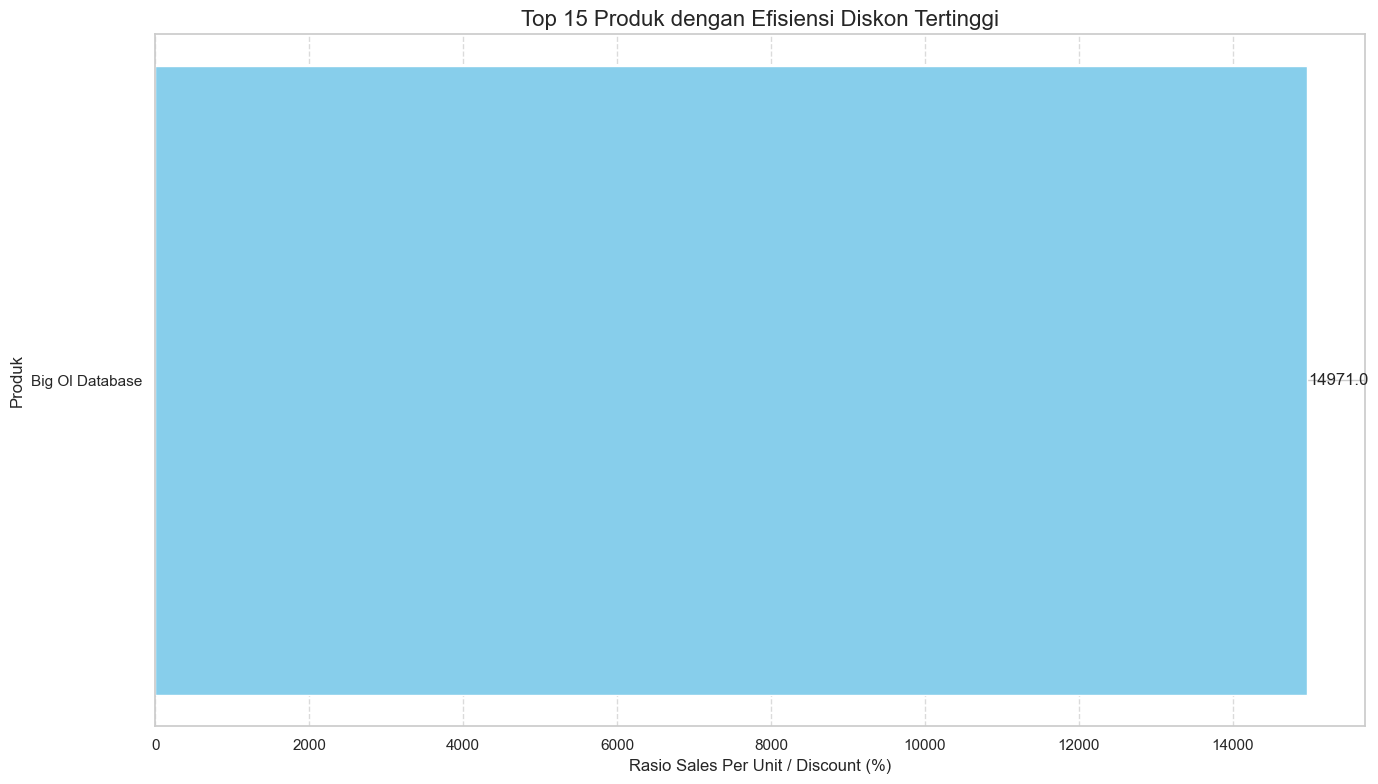

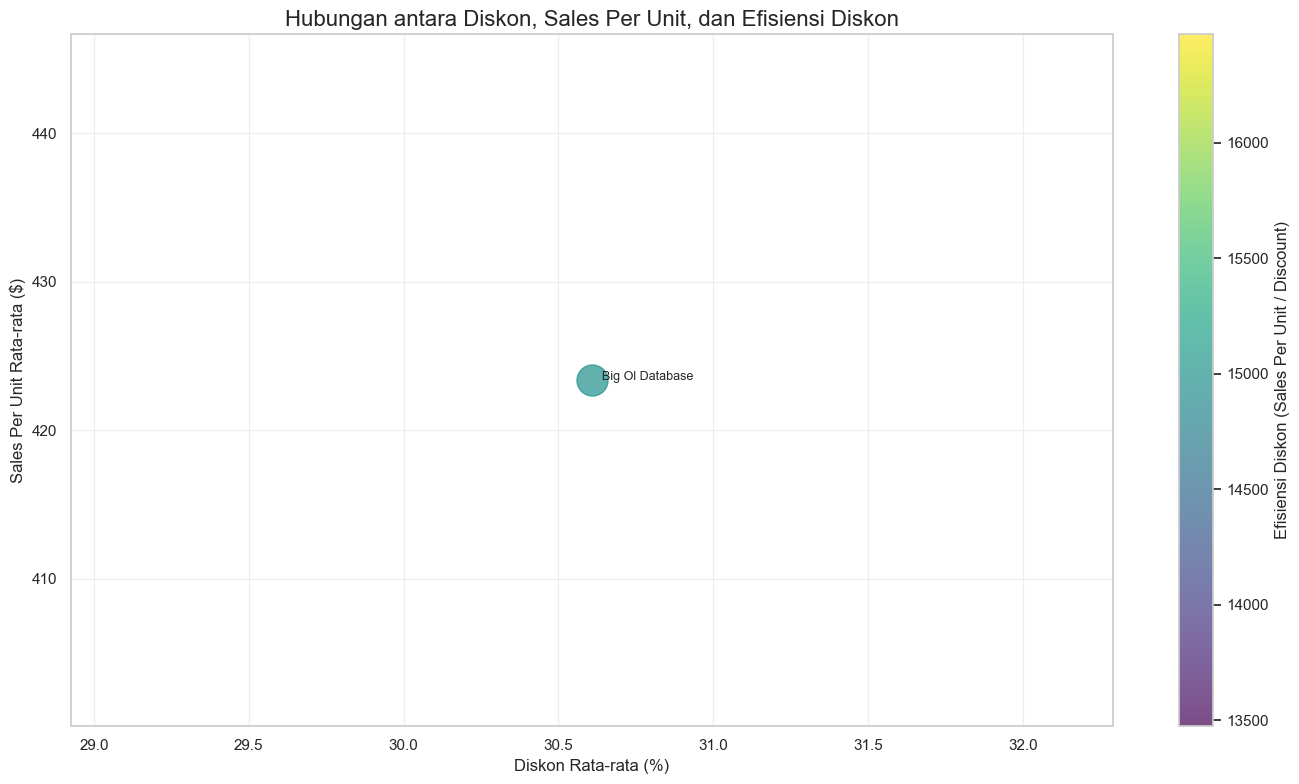

<Figure size 1400x600 with 0 Axes>

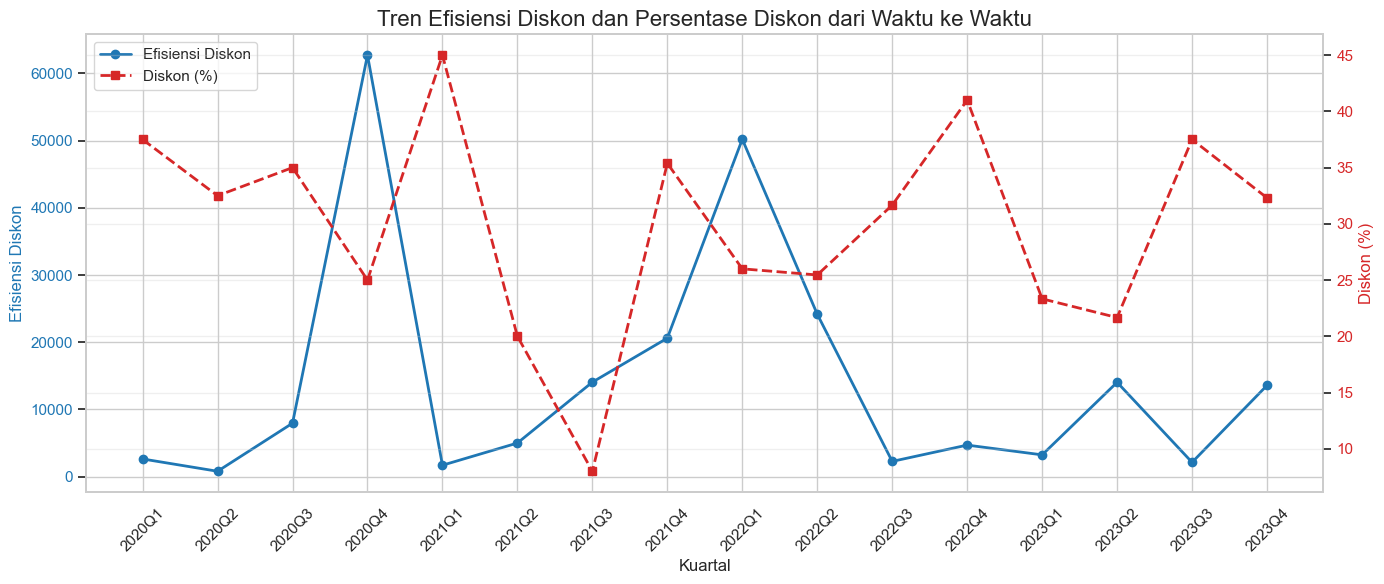

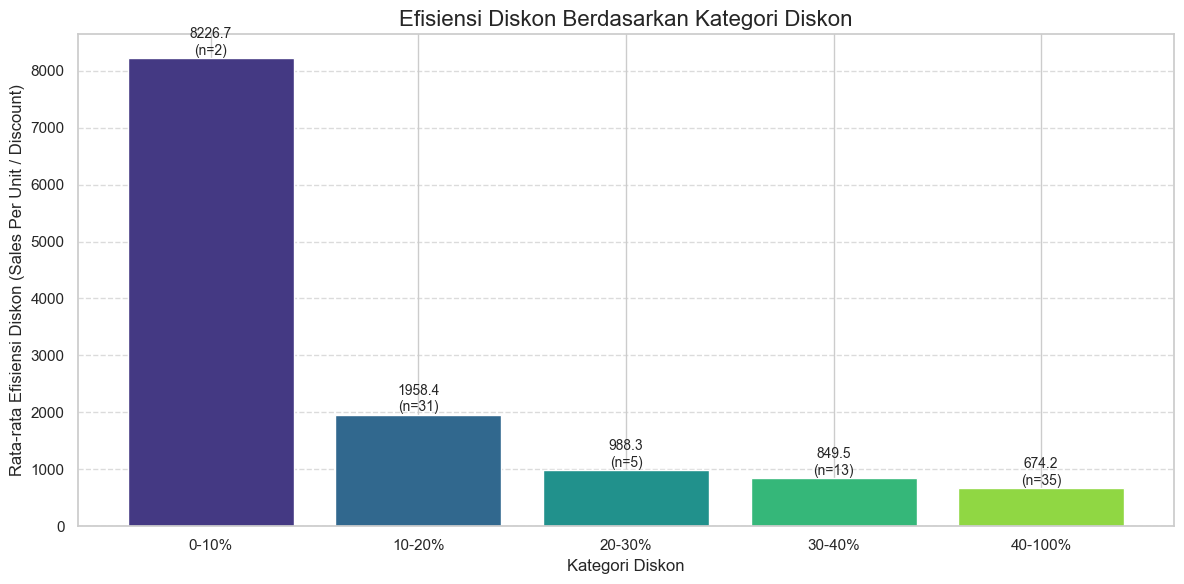

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi data sudah tersedia dalam dataframe 'big_ol_df'
# Jika belum, Anda perlu menyesuaikan kode di bawah

# 1. Hitung rasio Sales Per Unit terhadap Discount
# Untuk menghindari division by zero, tambahkan nilai kecil pada diskon
def calculate_efficiency(df):
    # Tambahkan kolom efisiensi diskon
    # Tambahkan epsilon kecil (0.0001) untuk menghindari division by zero
    df['DiscountEfficiency'] = df['SalesPerUnit'] / (df['Discount'] + 0.0001)
    
    # Untuk produk tanpa diskon (diskon = 0), kita bisa set nilai efisiensi sebagai NaN
    # atau memberikan nilai spesial
    df.loc[df['Discount'] < 0.01, 'DiscountEfficiency'] = df.loc[df['Discount'] < 0.01, 'SalesPerUnit'] * 100
    
    return df

# Terapkan fungsi kalkulasi
big_ol_df = calculate_efficiency(big_ol_df)

# 2. Visualisasi 1: Efisiensi Diskon per Produk (Top 15)
plt.figure(figsize=(14, 8))

# Ambil rata-rata efisiensi diskon per produk
product_efficiency = big_ol_df.groupby('Product').agg({
    'DiscountEfficiency': 'mean',
    'SalesPerUnit': 'mean',
    'Discount': 'mean',
    'Sales': 'sum'
}).reset_index()

# Urutkan berdasarkan efisiensi diskon (dari tertinggi ke terendah)
product_efficiency = product_efficiency.sort_values('DiscountEfficiency', ascending=False).head(15)

# Plot horizontal bar chart
plt.barh(product_efficiency['Product'], product_efficiency['DiscountEfficiency'], color='skyblue')

# Tambahkan anotasi nilai pada setiap bar
for i, v in enumerate(product_efficiency['DiscountEfficiency']):
    plt.text(v + 5, i, f'{v:.1f}', va='center')

plt.title('Top 15 Produk dengan Efisiensi Diskon Tertinggi', fontsize=16)
plt.xlabel('Rasio Sales Per Unit / Discount (%)', fontsize=12)
plt.ylabel('Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 3. Visualisasi 2: Scatter plot Efisiensi Diskon vs Sales
plt.figure(figsize=(14, 8))

# Buat ukuran bubble berdasarkan jumlah total penjualan
sizes = product_efficiency['Sales'] / product_efficiency['Sales'].max() * 500

# Scatter plot dengan ukuran bubble berdasarkan total penjualan
scatter = plt.scatter(
    product_efficiency['Discount'] * 100,  # Konversi ke persentase
    product_efficiency['SalesPerUnit'],
    s=sizes,
    c=product_efficiency['DiscountEfficiency'],
    cmap='viridis',
    alpha=0.7
)

# Tambahkan label produk
for i, txt in enumerate(product_efficiency['Product']):
    plt.annotate(txt, 
                (product_efficiency['Discount'].iloc[i] * 100, 
                 product_efficiency['SalesPerUnit'].iloc[i]),
                xytext=(7, 0), 
                textcoords='offset points',
                fontsize=9)

plt.colorbar(scatter, label='Efisiensi Diskon (Sales Per Unit / Discount)')
plt.title('Hubungan antara Diskon, Sales Per Unit, dan Efisiensi Diskon', fontsize=16)
plt.xlabel('Diskon Rata-rata (%)', fontsize=12)
plt.ylabel('Sales Per Unit Rata-rata ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 4. Visualisasi 3: Tren Efisiensi Diskon dari Waktu ke Waktu
plt.figure(figsize=(14, 6))

# Grouping berdasarkan waktu (YearQuarter)
time_trend = big_ol_df.groupby('YearQuarter').agg({
    'DiscountEfficiency': 'mean',
    'SalesPerUnit': 'mean',
    'Discount': 'mean'
}).reset_index()

# Urutkan berdasarkan waktu
time_trend = time_trend.sort_values('YearQuarter')

# Plot dual axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Kuartal')
ax1.set_ylabel('Efisiensi Diskon', color=color)
line1 = ax1.plot(time_trend['YearQuarter'], time_trend['DiscountEfficiency'], 
                color=color, marker='o', linestyle='-', linewidth=2, label='Efisiensi Diskon')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(time_trend['YearQuarter'])))
ax1.set_xticklabels(time_trend['YearQuarter'], rotation=45)

# Tambahkan sumbu kedua untuk diskon
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Diskon (%)', color=color)
line2 = ax2.plot(time_trend['YearQuarter'], time_trend['Discount'] * 100, 
                color=color, marker='s', linestyle='--', linewidth=2, label='Diskon (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Gabungkan legend dari kedua sumbu
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Tren Efisiensi Diskon dan Persentase Diskon dari Waktu ke Waktu', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 5. Visualisasi 4: Distribusi Efisiensi Diskon per Kategori Diskon
plt.figure(figsize=(12, 6))

# Buat kategori diskon
bins = [0, 0.1, 0.2, 0.3, 0.4, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-100%']
big_ol_df['DiscountCategory'] = pd.cut(big_ol_df['Discount'], bins=bins, labels=labels)

# Hitung rata-rata efisiensi per kategori diskon
discount_cat_efficiency = big_ol_df.groupby('DiscountCategory').agg({
    'DiscountEfficiency': 'mean',
    'Order ID': 'count'  # Jumlah order dalam kategori
}).reset_index()

# Plot bar chart
bars = plt.bar(discount_cat_efficiency['DiscountCategory'], 
               discount_cat_efficiency['DiscountEfficiency'],
               color=sns.color_palette("viridis", len(discount_cat_efficiency)))

# Tambahkan label pada setiap bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = discount_cat_efficiency.iloc[i]['Order ID']
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f'{height:.1f}\n(n={count})',
             ha='center', va='bottom', fontsize=10)

plt.title('Efisiensi Diskon Berdasarkan Kategori Diskon', fontsize=16)
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-rata Efisiensi Diskon (Sales Per Unit / Discount)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan semua visualisasi
plt.show()

Statistik per kategori diskon:
  Discount_Category  count    mean  median
0             0-10%     31 $570.84 $258.95
1            10-20%     31 $391.87 $279.20
2            20-30%      5 $296.60 $300.26
3            30-40%     13 $339.89 $199.77
4            40-50%     12 $745.96 $336.18
5              50%+     23 $173.40 $114.00

Menggunakan kategori 0-10% sebagai baseline (median: 258.95)

Hasil perbandingan kategori diskon dengan baseline (0-10%):
  Kategori  Samples  Median vs. Baseline  p-value Signifikan Arah Pengaruh
0   10-20%       31 $279.20       ↑ 7.8%    $0.50      Tidak       Positif
1   20-30%        5 $300.26      ↑ 16.0%    $0.96      Tidak       Positif
2   30-40%       13 $199.77      ↓ 22.9%    $0.90      Tidak       Negatif
3   40-50%       12 $336.18      ↑ 29.8%    $0.80      Tidak       Positif
4     50%+       23 $114.00      ↓ 56.0%    $0.01         Ya       Negatif


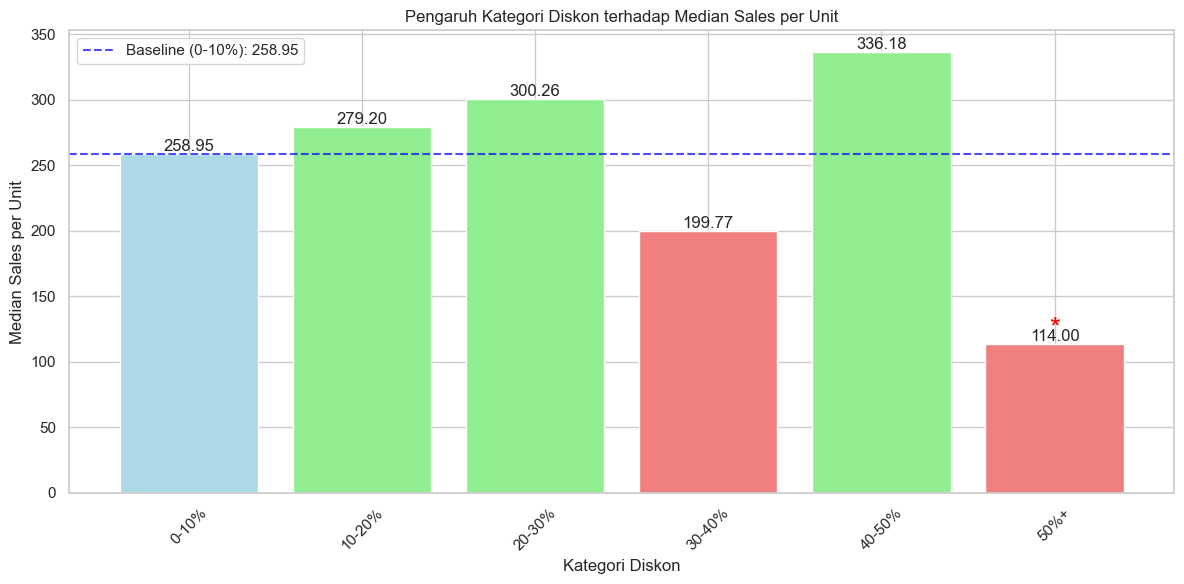


Visualisasi telah disimpan sebagai 'discount_effect.png'

Kesimpulan:
Tolak H0: Kategori diskon berpengaruh signifikan terhadap sales per unit

Detail pengaruh yang signifikan:
- Kategori 50%+ berpengaruh negatif ↓ 56.0% terhadap sales per unit (p-value: 0.0087)


In [40]:


# Menghitung Sales per Unit
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit', 'Discount'])

# Membuat kategori diskon dalam kelipatan 10%
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Tampilkan jumlah data dan statistik per kategori diskon
stats_summary = big_ol_df.groupby('Discount_Category')['SalesPerUnit'].agg(['count', 'mean', 'median']).reset_index()
stats_summary = stats_summary.sort_values('Discount_Category')
print("Statistik per kategori diskon:")
print(stats_summary)

# Definisi hipotesis
H0 = 'Kategori diskon tidak berpengaruh signifikan terhadap sales per unit'
Ha = 'Kategori diskon berpengaruh signifikan terhadap sales per unit'

# Dapatkan kategori dengan minimal 5 data
valid_categories = stats_summary[stats_summary['count'] >= 5]['Discount_Category'].tolist()

# Gunakan kategori dengan diskon terendah sebagai baseline/referensi
if '0-10%' in valid_categories:
    baseline_category = '0-10%'
    baseline_data = big_ol_df[big_ol_df['Discount_Category'] == baseline_category]['SalesPerUnit']
    baseline_median = baseline_data.median()
    
    print(f"\nMenggunakan kategori {baseline_category} sebagai baseline (median: {baseline_median:.2f})")
    
    # Bandingkan setiap kategori diskon dengan baseline
    comparison_results = []
    
    for category in valid_categories:
        if category != baseline_category:
            # Data untuk kategori yang dibandingkan
            category_data = big_ol_df[big_ol_df['Discount_Category'] == category]['SalesPerUnit']
            category_median = category_data.median()
            
            # Uji Mann-Whitney U
            u_stat, p_value = mannwhitneyu(baseline_data, category_data, alternative='two-sided')
            
            # Tentukan arah pengaruh
            if category_median > baseline_median:
                effect_direction = "Positif"
                effect_symbol = "↑"
            else:
                effect_direction = "Negatif"
                effect_symbol = "↓"
            
            # Hitung persentase perbedaan
            pct_diff = (category_median - baseline_median) / baseline_median * 100
            
            # Simpan hasil
            comparison_results.append({
                'Kategori': category,
                'Samples': len(category_data),
                'Median': category_median,
                'vs. Baseline': f"{effect_symbol} {abs(pct_diff):.1f}%",
                'p-value': p_value,
                'Signifikan': 'Ya' if p_value < 0.05 else 'Tidak',
                'Arah Pengaruh': effect_direction
            })
    
    # Tampilkan hasil
    if comparison_results:
        results_df = pd.DataFrame(comparison_results).sort_values('Kategori')
        print("\nHasil perbandingan kategori diskon dengan baseline (0-10%):")
        print(results_df)
        
        # Visualisasi pengaruh diskon terhadap sales per unit
        plt.figure(figsize=(12, 6))
        
        # Data untuk plot
        all_medians = stats_summary.set_index('Discount_Category')['median']
        all_categories = all_medians.index.tolist()
        
        # Plot median per kategori
        bars = plt.bar(all_categories, all_medians, color=[
            'lightblue' if cat == baseline_category else 
            'lightgreen' if all_medians[cat] > baseline_median else 
            'lightcoral' for cat in all_categories
        ])
        
        # Tambahkan label nilai di atas bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
        
        # Tambahkan garis baseline
        plt.axhline(y=baseline_median, color='blue', linestyle='--', alpha=0.7, 
                   label=f'Baseline ({baseline_category}): {baseline_median:.2f}')
        
        # Label signifikansi
        for i, cat in enumerate(all_categories):
            if cat != baseline_category:
                result = results_df[results_df['Kategori'] == cat]
                if not result.empty and result['Signifikan'].values[0] == 'Ya':
                    plt.text(i, all_medians[cat] * 1.05, '*', 
                            fontsize=20, ha='center', color='red')
        
        plt.title('Pengaruh Kategori Diskon terhadap Median Sales per Unit')
        plt.xlabel('Kategori Diskon')
        plt.ylabel('Median Sales per Unit')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('discount_effect.png')
        plt.show()
        plt.close()
        
        print("\nVisualisasi telah disimpan sebagai 'discount_effect.png'")
        
        # Kesimpulan keseluruhan
        significant_results = results_df[results_df['Signifikan'] == 'Ya']
        if len(significant_results) > 0:
            print("\nKesimpulan:")
            print("Tolak H0:", Ha)
            print("\nDetail pengaruh yang signifikan:")
            for _, row in significant_results.iterrows():
                print(f"- Kategori {row['Kategori']} berpengaruh {row['Arah Pengaruh'].lower()} {row['vs. Baseline']} terhadap sales per unit (p-value: {row['p-value']:.4f})")
        else:
            print("\nKesimpulan:")
            print("Gagal tolak H0:", H0)
            print("Tidak ada kategori diskon yang berpengaruh signifikan terhadap sales per unit dibandingkan dengan baseline (0-10%)")
    else:
        print("Tidak ada kategori diskon valid untuk dibandingkan dengan baseline")
else:
    print(f"Kategori baseline (0-10%) tidak memiliki cukup data (minimal 5)")

In [ ]:
from scipy.stats import kruskal
import pandas as pd

# Menghitung Sales per Unit
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit'])

# Pastikan Order Date dalam format datetime dan extract Year_Quarter
big_ol_df['Order Date'] = pd.to_datetime(big_ol_df['Order Date'])
big_ol_df['Year'] = big_ol_df['Order Date'].dt.year
big_ol_df['Quarter'] = big_ol_df['Order Date'].dt.quarter
big_ol_df['Year_Quarter'] = big_ol_df['Year'].astype(str) + 'Q' + big_ol_df['Quarter'].astype(str)

# Definisi hipotesis
H0 = 'Median sales per unit tidak berbeda signifikan antar quarter'
Ha = 'Setidaknya ada satu pasang quarter yang memiliki median sales per unit berbeda secara signifikan'

# Dapatkan semua quarter unik
unique_quarters = big_ol_df['Year_Quarter'].unique()
print("Quarter yang tersedia:", unique_quarters)

# Tampilkan jumlah data per quarter
print("\nJumlah data per quarter:")
for quarter in unique_quarters:
    count = len(big_ol_df[big_ol_df['Year_Quarter'] == quarter])
    print(f"{quarter}: {count}")

# Siapkan sampel untuk setiap quarter
samples = []
valid_quarters = []

for quarter in unique_quarters:
    sample = big_ol_df[big_ol_df['Year_Quarter'] == quarter]['SalesPerUnit']
    if len(sample) >= 5:  # Minimal 5 sampel untuk validitas statistik
        samples.append(sample)
        valid_quarters.append(quarter)

# Uji Kruskal-Wallis
if len(samples) >= 2:
    stats, pval = kruskal(*samples)
    print("\nHasil Uji Kruskal-Wallis untuk Sales Per Unit berdasarkan Quarter:")
    print('P-Value:', pval)
    print('H-Statistic:', stats)
    
    if pval < 0.05:
        print("\nKeputusan: Tolak H0")
        print("Kesimpulan:", Ha)
    else:
        print("\nKeputusan: Gagal tolak H0")
        print("Kesimpulan:", H0)
        
    print("\nQuarter yang dianalisis:", valid_quarters)
else:
    print("Tidak cukup quarter dengan data minimal 5 untuk melakukan uji Kruskal-Wallis")

Quarter yang tersedia: ['2020Q3' '2021Q1' '2021Q4' '2020Q4' '2022Q2' '2023Q4' '2022Q3' '2023Q1'
 '2023Q3' '2021Q2' '2022Q1' '2022Q4' '2021Q3' '2020Q1' '2020Q2' '2023Q2']

Jumlah data per quarter:
2020Q3: 12
2021Q1: 2
2021Q4: 13
2020Q4: 6
2022Q2: 11
2023Q4: 13
2022Q3: 6
2023Q1: 6
2023Q3: 8
2021Q2: 4
2022Q1: 5
2022Q4: 10
2021Q3: 5
2020Q1: 4
2020Q2: 4
2023Q2: 6

Hasil Uji Kruskal-Wallis untuk Sales Per Unit berdasarkan Quarter:
P-Value: 0.8181665365377178
H-Statistic: 6.76008033659221

Keputusan: Gagal tolak H0
Kesimpulan: Median sales per unit tidak berbeda signifikan antar quarter

Quarter yang dianalisis: ['2020Q3', '2021Q4', '2020Q4', '2022Q2', '2023Q4', '2022Q3', '2023Q1', '2023Q3', '2022Q1', '2022Q4', '2021Q3', '2023Q2']


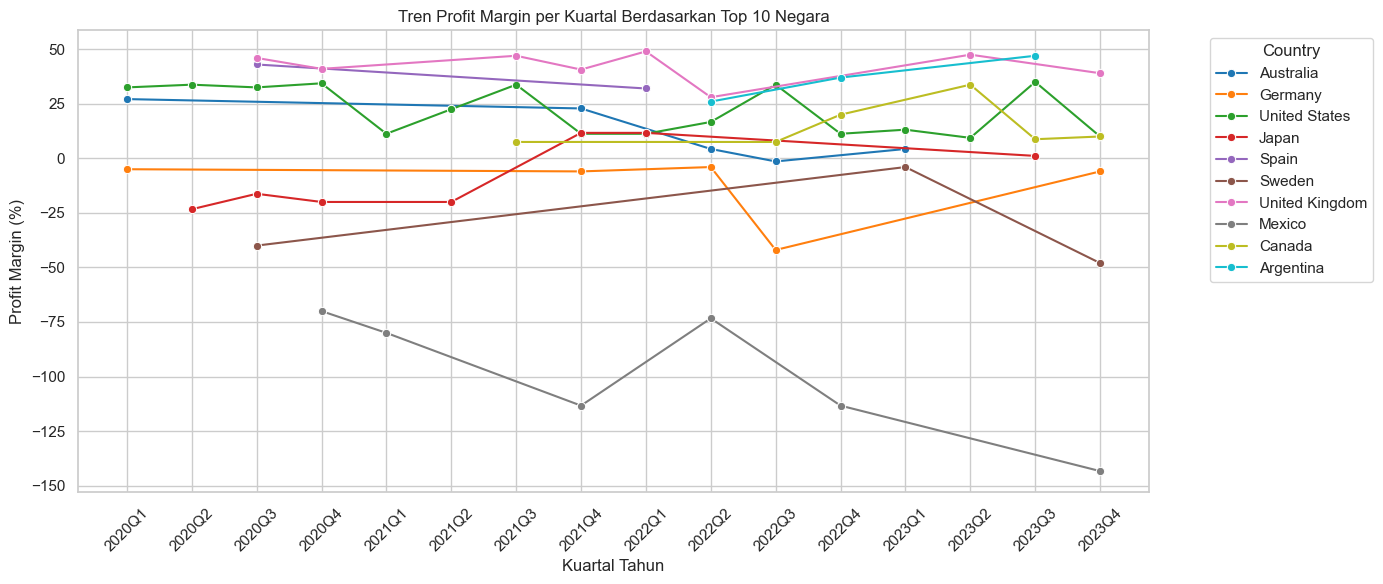

In [ ]:
# Step 1: Group by Country and calculate total Sales to find top 6 countries
country_sales = big_ol_df.groupby('Country')['Sales'].sum()

# Step 2: Identify top 6 countries by Sales
top_countries = list(country_sales.nlargest(10).index)

# Step 3: Filter data hanya untuk top 6 countries
filtered_df = big_ol_df[big_ol_df['Country'].isin(top_countries)].copy()

# Step 4: Group by YearQuarter and Country, calculate mean Profit Margin
quarterly = filtered_df.groupby(['YearQuarter', 'Country'])['Profit_Margin'].mean().reset_index()

# Step 5: Create a single line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly, x='YearQuarter', y='Profit_Margin', hue='Country', marker='o', palette='tab10')
plt.xticks(rotation=45)
plt.title('Tren Profit Margin per Kuartal Berdasarkan Top 10 Negara')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Kuartal Tahun')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


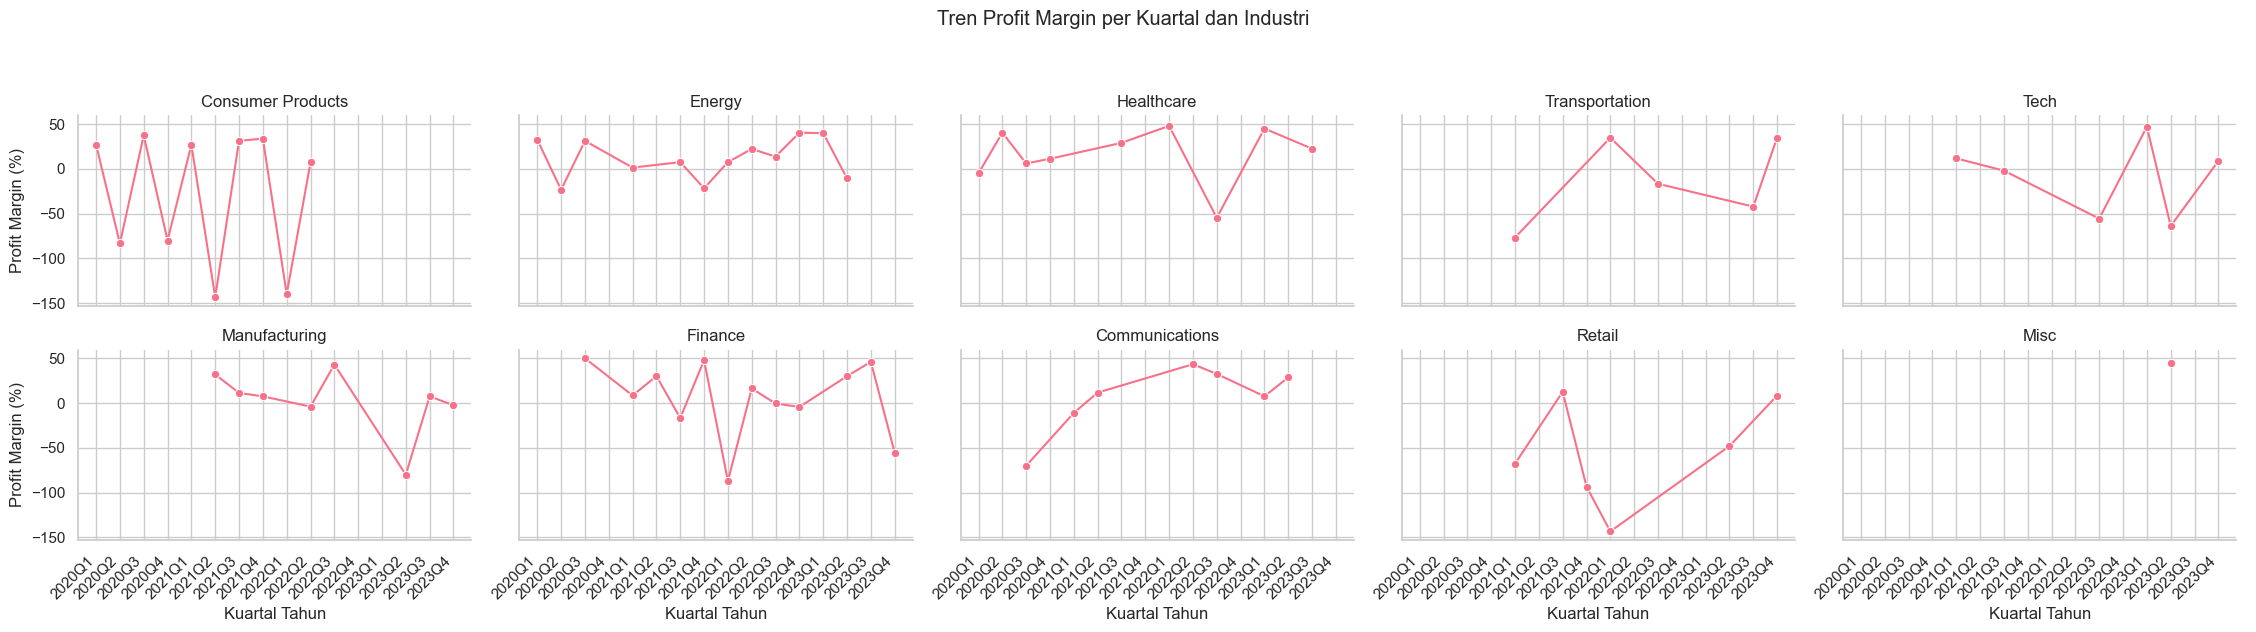

In [ ]:
# Group by YearQuarter and Industry, calculate mean Profit Margin
quarterly = big_ol_df.groupby(['YearQuarter', 'Industry'])['Profit_Margin'].mean().reset_index()

# Sort the data by YearQuarter to ensure chronological order
quarterly = quarterly.sort_values('YearQuarter')

# Create a FacetGrid
g = sns.FacetGrid(quarterly, col='Industry', col_wrap=5, height=3, aspect=1.5)
g.map(sns.lineplot, 'YearQuarter', 'Profit_Margin', marker='o')

# Customize the plot
g.set_titles('{col_name}')
g.set_axis_labels('Kuartal Tahun', 'Profit Margin (%)')

# Rotate and ensure all x-axis labels are shown
for ax in g.axes.flat:
    ax.set_xticks(range(len(quarterly['YearQuarter'].unique())))
    ax.set_xticklabels(quarterly['YearQuarter'].unique(), rotation=45, ha='right')

g.fig.suptitle('Tren Profit Margin per Kuartal dan Industri', y=1.05)
g.add_legend()
plt.tight_layout()
plt.show()